In [ ]:
import requests
import pandas as pd
import numpy as np



In [ ]:
category = 'poi'
def get_place(loc):
  # Define the parameters for the search query
  url = f'http://tour-pedia.org/api/getPlaces?location={loc}&category={category}'

  # Make the HTTP GET request to retrieve the places
  response = requests.get(url)

  # Check if the request was successful
  if response.status_code == 200:
      places = response.json()  # Extract JSON data from the response
      # Convert the JSON data into a DataFrame
      df_places = pd.DataFrame(places)

      # Save the DataFrame to a CSV file
      csv_file_path = f'{category}_{loc}.csv'
      df_places.to_csv(csv_file_path, index=False)

      print(f"CSV file saved as {csv_file_path}")
  else:
      print(f"Failed to retrieve data. Status code: {response.status_code}")


In [ ]:

# Load the original CSV file with the 'reviews' column
def extract_reviews(destination):
  csv_file_path = f'{category}_{destination}.csv'
  df_places = pd.read_csv(csv_file_path)

  # Filter out rows where the 'reviews' column is null or missing
  df_places_non_null = df_places.dropna(subset=['reviews'])

  # List to store the fetched review data
  all_reviews = []

  # Generate a list of random, unique indices only from rows with valid 'reviews' URLs
  random_indices = np.random.choice(df_places_non_null.index, size=100, replace=False)

  # Loop over each randomly chosen index
  for num in random_indices:
      review_url = df_places_non_null.loc[num]['reviews']  # Extract the review URL from the 'reviews' column

      # Make the API request to get the reviews
      try:
          response = requests.get(review_url)
          if response.status_code == 200:
              reviews_data = response.json()  # Extract the JSON response
              # Loop through each review and extract the required fields
              for review in reviews_data:
                  all_reviews.append({
                      'id': df_places_non_null.loc[num]['id'],
                      'name': df_places_non_null.loc[num]['name'],
                      'lat': df_places_non_null.loc[num]['lat'],
                      'lng': df_places_non_null.loc[num]['lng'],
                      'subCategory': df_places_non_null.loc[num]['subCategory'],
                      'location': df_places_non_null.loc[num]['location'],
                      'language': review.get('language'),
                      'polarity': review.get('polarity'),
                      'rating': review.get('rating'),
                      'source': review.get('source'),
                      'text': review.get('text'),
                      'time': review.get('time'),
                      'wordsCount': review.get('wordsCount'),
                      'details': review.get('details')
                  })
          else:
              print(f"Failed to retrieve reviews for {review_url}. Status code: {response.status_code}")
      except Exception as e:
          print(f"Error occurred: {e}")

  # Convert the list of reviews to a DataFrame
  df_reviews = pd.DataFrame(all_reviews)

  # Save the reviews to a new CSV file
  new_csv_file_path = f'{destination}_reviews_{category}.csv'
  df_reviews.to_csv(new_csv_file_path, index=False)


In [ ]:
destinations = ['Amsterdam', 'Barcelona', 'Berlin', 'Dubai', 'London', 'Paris', 'Rome', 'Tuscany']
for a in destinations:
  get_place(a)
  extract_reviews(a)

CSV file saved as poi_Amsterdam.csv


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import os

# List of CSV files to combine
csv_files = [
    'Amsterdam_reviews.csv',
    'Berlin_reviews.csv',
    'Barcelona_reviews.csv',
    'Tuscany_reviews.csv',
    'London_reviews.csv',
    'Rome_reviews.csv',
    'Paris_reviews.csv',
    'Dubai_reviews.csv',
]

# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    if os.path.exists(file):  # Check if the file exists
        df = pd.read_csv(file)  # Read the CSV into a DataFrame
        dataframes.append(df)  # Append the DataFrame to the list
    else:
        print(f"{file} does not exist.")

# Concatenate all the DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_csv_file = 'combined_places.csv'
combined_df.to_csv(combined_csv_file, index=False)

print(f"All files combined and saved to {combined_csv_file}")


Amsterdam_reviews.csv does not exist.
Berlin_reviews.csv does not exist.
Barcelona_reviews.csv does not exist.
Tuscany_reviews.csv does not exist.
London_reviews.csv does not exist.
Rome_reviews.csv does not exist.
Paris_reviews.csv does not exist.
Dubai_reviews.csv does not exist.


ValueError: No objects to concatenate

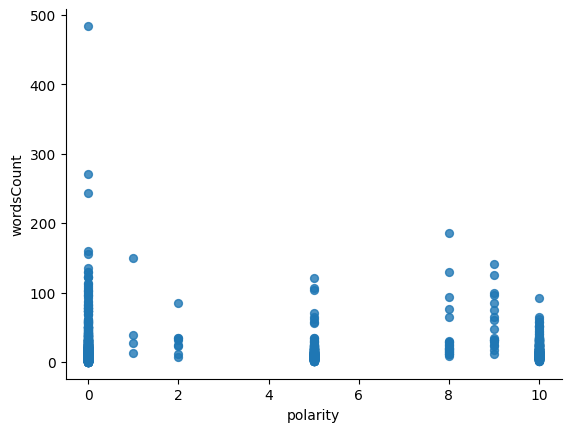

In [ ]:

# @title polarity vs wordsCount

from matplotlib import pyplot as plt
df_reviews.plot(kind='scatter', x='polarity', y='wordsCount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

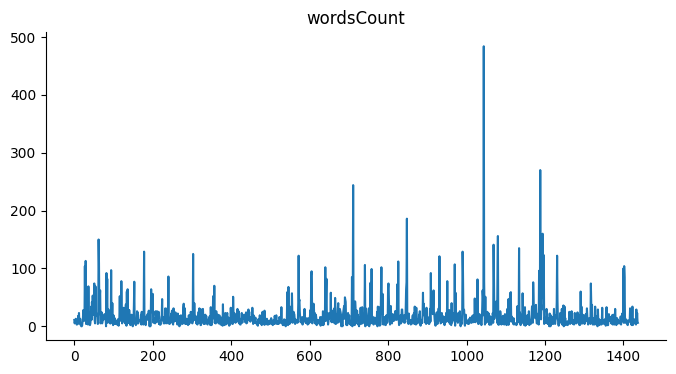

In [ ]:
# @title wordsCount

from matplotlib import pyplot as plt
df_reviews['wordsCount'].plot(kind='line', figsize=(8, 4), title='wordsCount')
plt.gca().spines[['top', 'right']].set_visible(False)

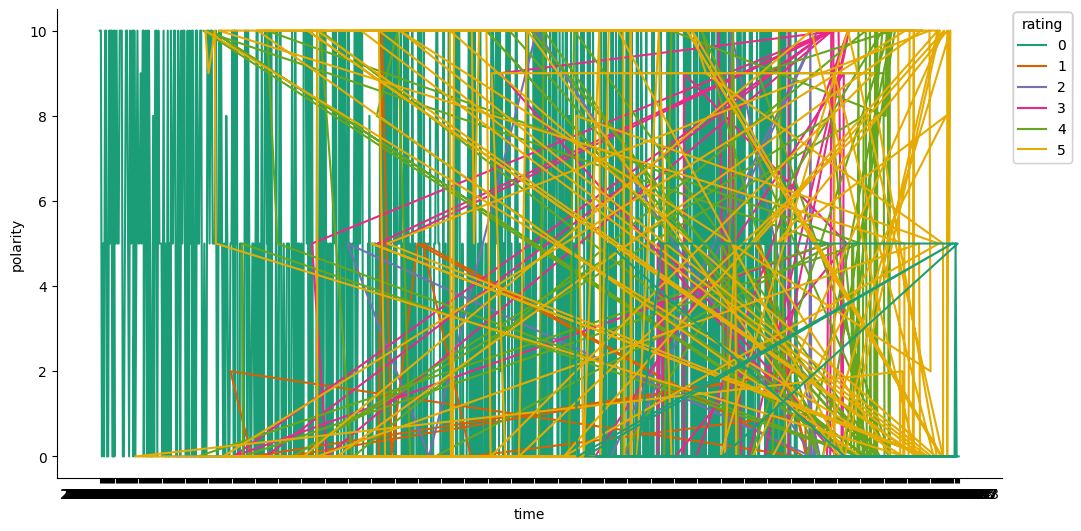

In [ ]:
# @title time vs polarity

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['polarity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_reviews.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rating')):
  _plot_series(series, series_name, i)
  fig.legend(title='rating', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('polarity')

In [ ]:
from google.colab import sheets
a = pd.read_csv('combined_places.csv')
sheet = sheets.InteractiveSheet(df=a)

https://docs.google.com/spreadsheets/d/1OHW53-EHj_Zbg-QjEmw5xYd2huPlGJ9I5x_MBdJwMAI#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
a.head()

id      name        lat       lng subCategory   location language  \
0  28044  Steiger1  52.369762  4.936941         NaN  Amsterdam       nl   
1  28044  Steiger1  52.369762  4.936941         NaN  Amsterdam       nl   
2  28044  Steiger1  52.369762  4.936941         NaN  Amsterdam       nl   
3  28044  Steiger1  52.369762  4.936941         NaN  Amsterdam       nl   
4  28044  Steiger1  52.369762  4.936941         NaN  Amsterdam       en   

   polarity  rating        source  \
0        10     0.0    Foursquare   
1        10     0.0    Foursquare   
2         5     0.0    Foursquare   
3        10     0.0    Foursquare   
4        10     5.0  GooglePlaces   

                                                text        time  wordsCount  \
0                          Heerlijke steigerburger!!  2013-07-18           2   
1  Top tent .. 10 minuten gezeten niemand ad tafe...  2013-07-11          20   
2  Laat je adviseren door gastvrouw/-heer bij men...  2013-04-25           8   
3                         eten, drinken en aanmeren!  2012-07-15           4   
4  Just wonderfull.... great place to hang out, c...  2012-08-03          19   

                                             details  
0  http://tour-pedia.org/api/getReviewDetails?id=...  
1  http://tour-pedia.org/api/getReviewDetails?id=...  
2  http://tour-pedia.org/api/getReviewDetails?id=...  
3  http://tour-pedia.org/api/getReviewDetails?id=...  
4  http://tour-pedia.org/api/getReviewDetails?id=...

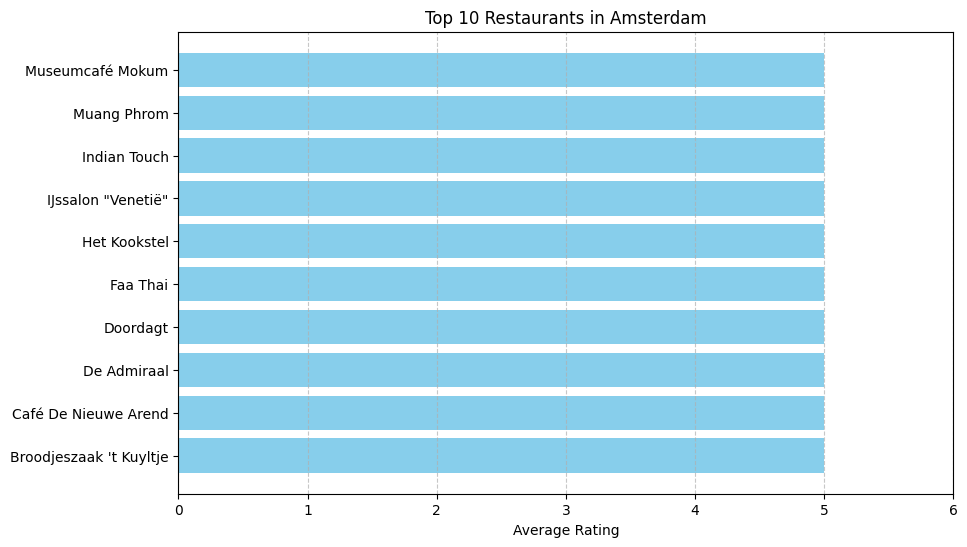

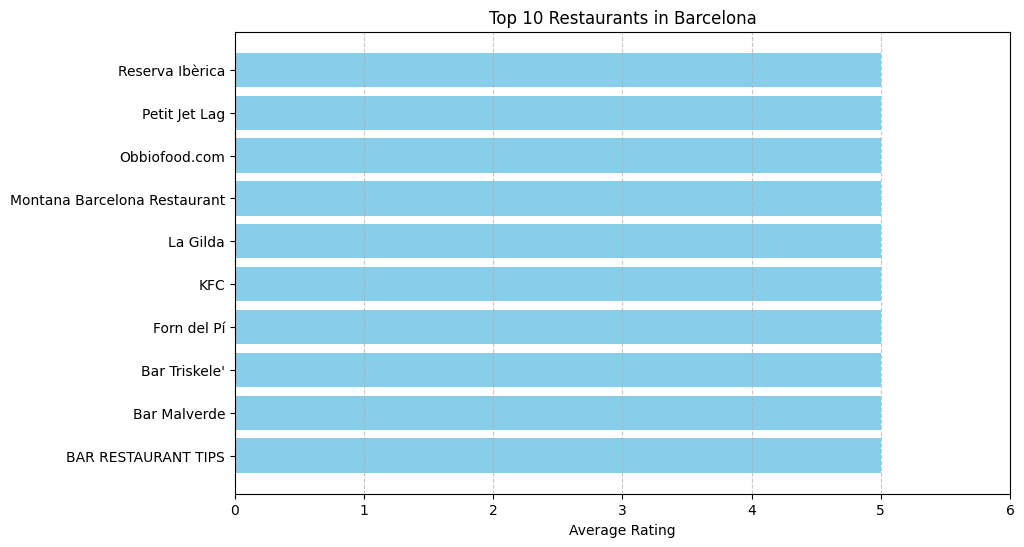

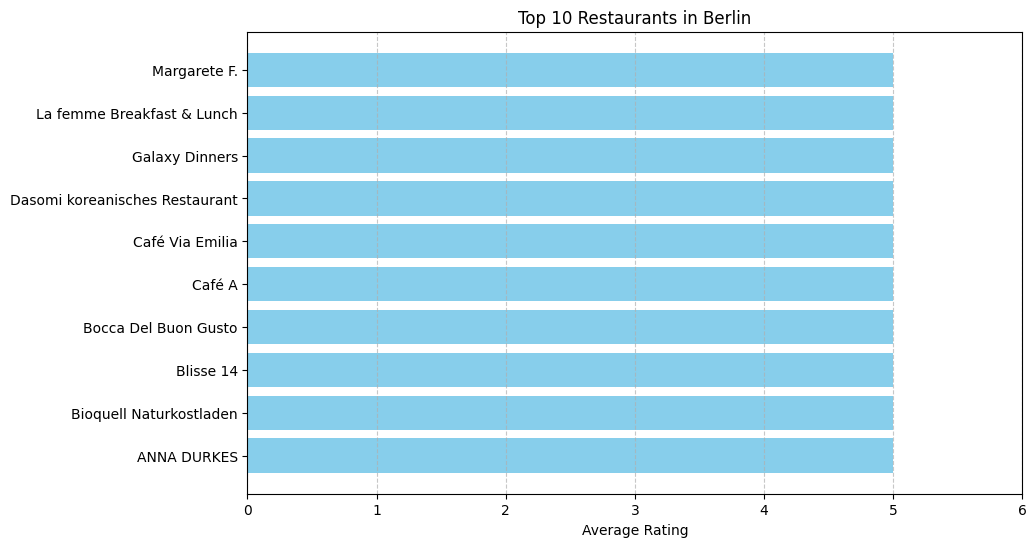

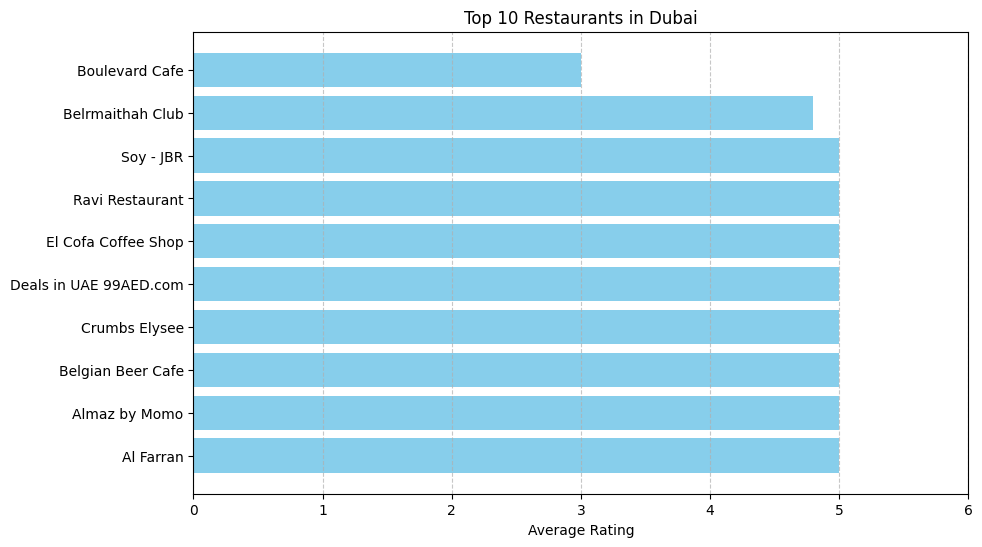

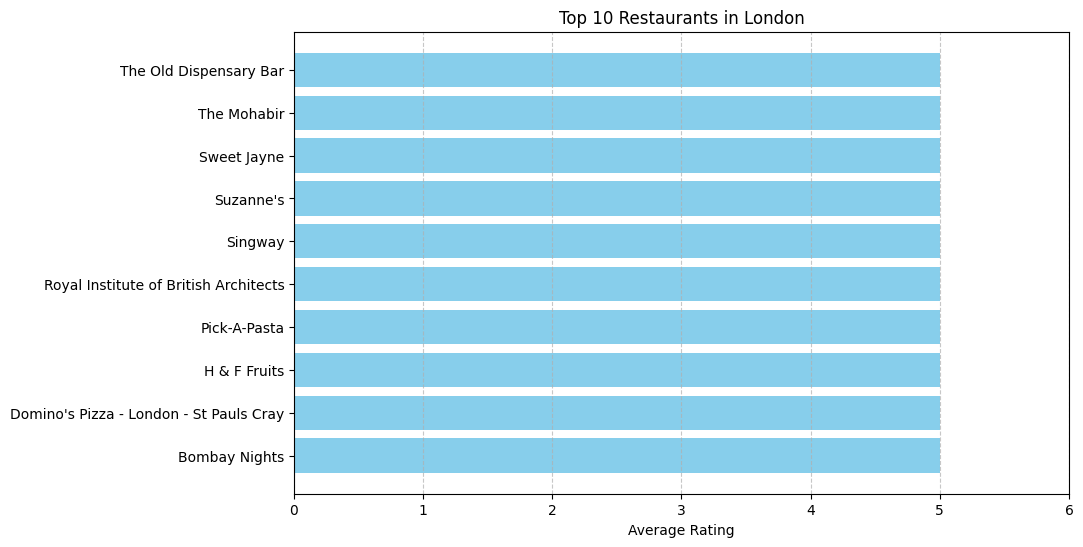

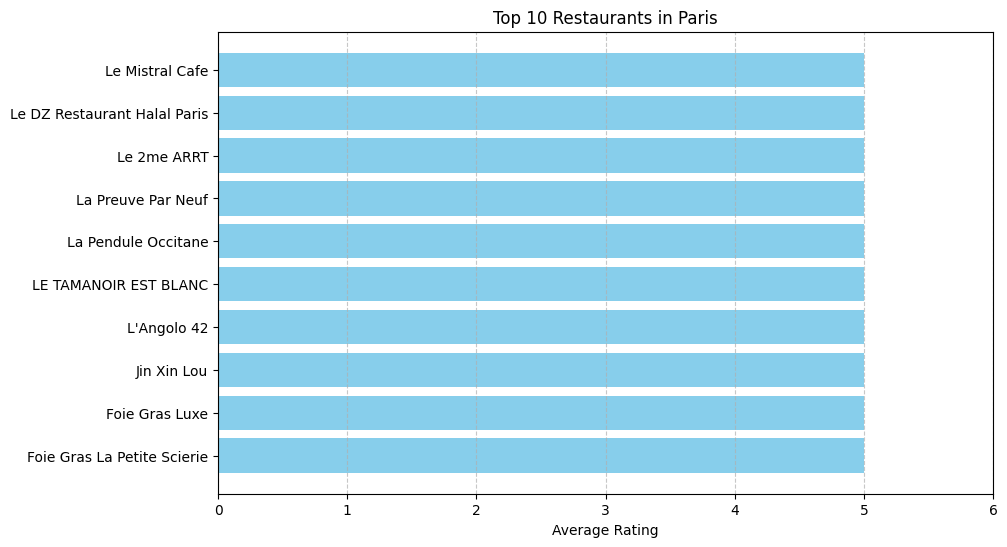

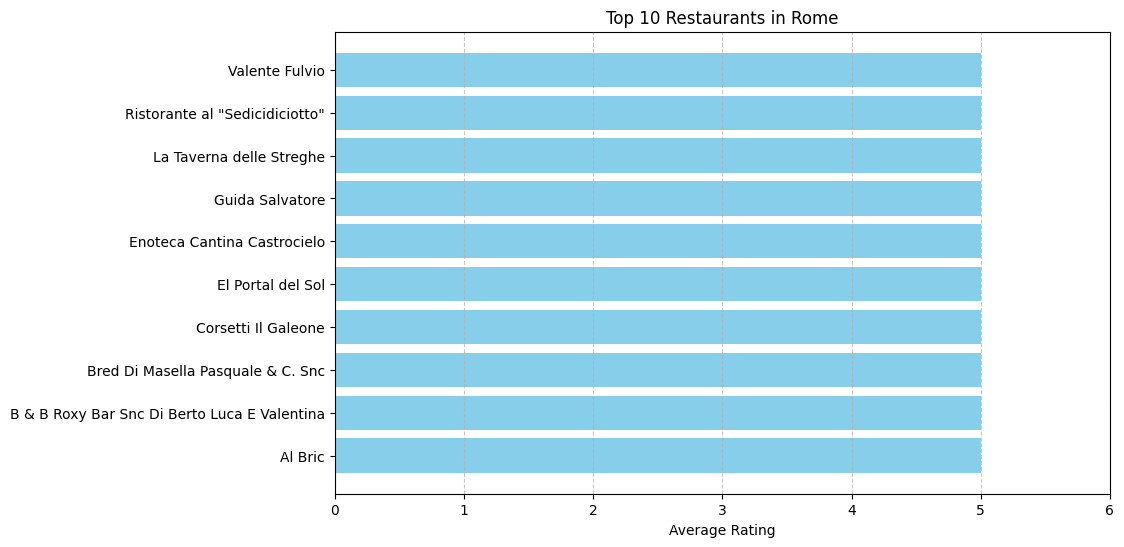

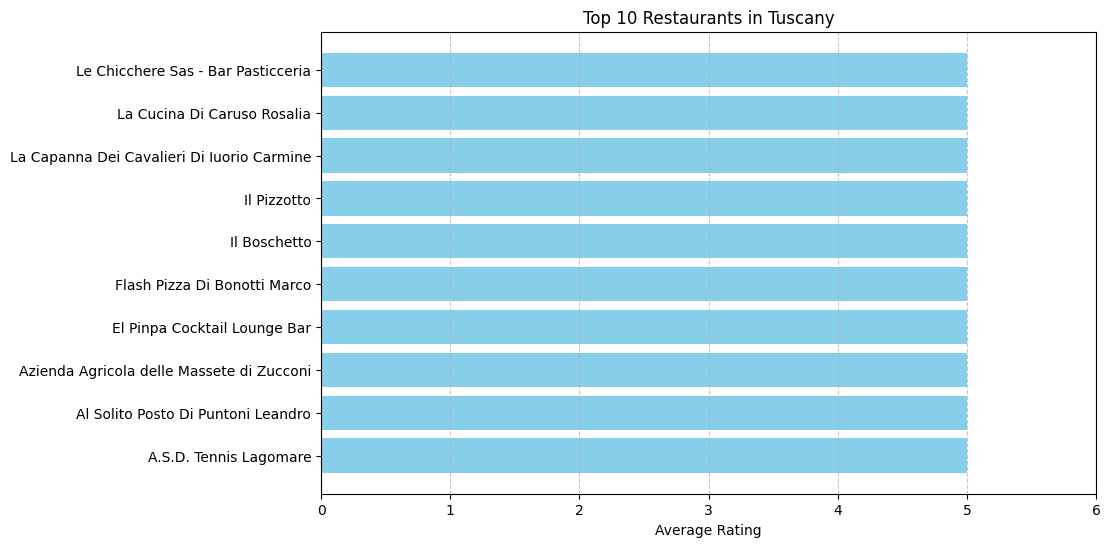

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


a_avg = a.groupby(['location', 'name'], as_index=False)['rating'].mean()

sorted_df = a_avg.sort_values(by=['location', 'rating'], ascending=[True, False])

top_10_df = sorted_df.groupby('location').head(10)

locations = top_10_df['location'].unique()

for location in locations:
    location_data = top_10_df[top_10_df['location'] == location]

    plt.figure(figsize=(10, 6))
    plt.barh(location_data['name'], location_data['rating'], color='skyblue')
    plt.xlabel('Average Rating')
    plt.title(f'Top 10 Restaurants in {location}')
    plt.xlim(0, location_data['rating'].max() + 1)  # Adjust xlim for better spacing
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


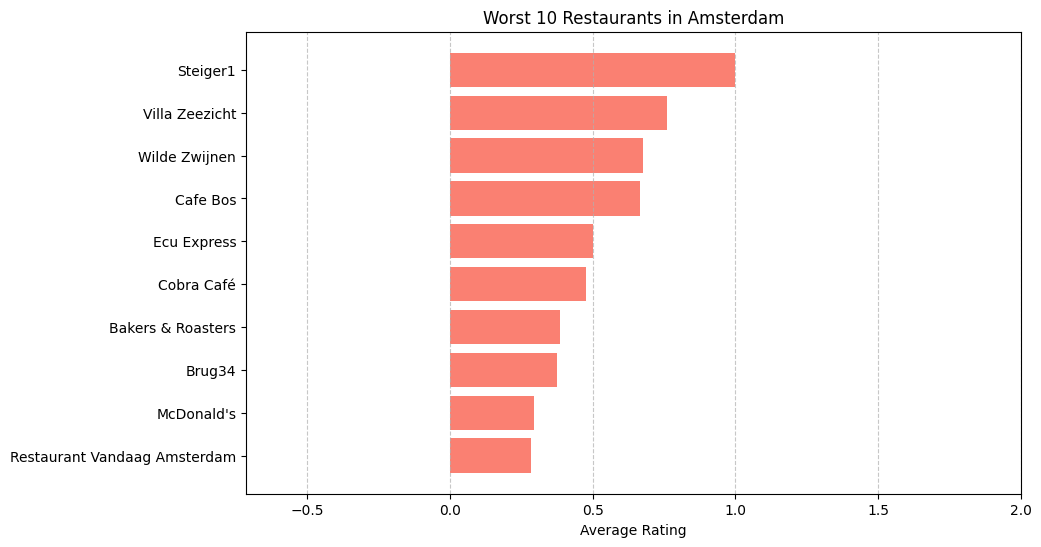

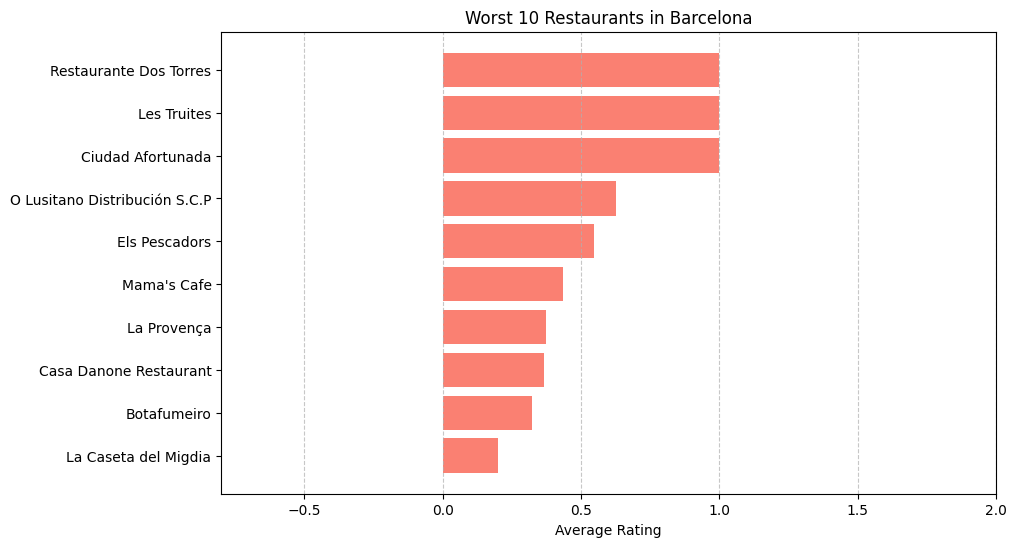

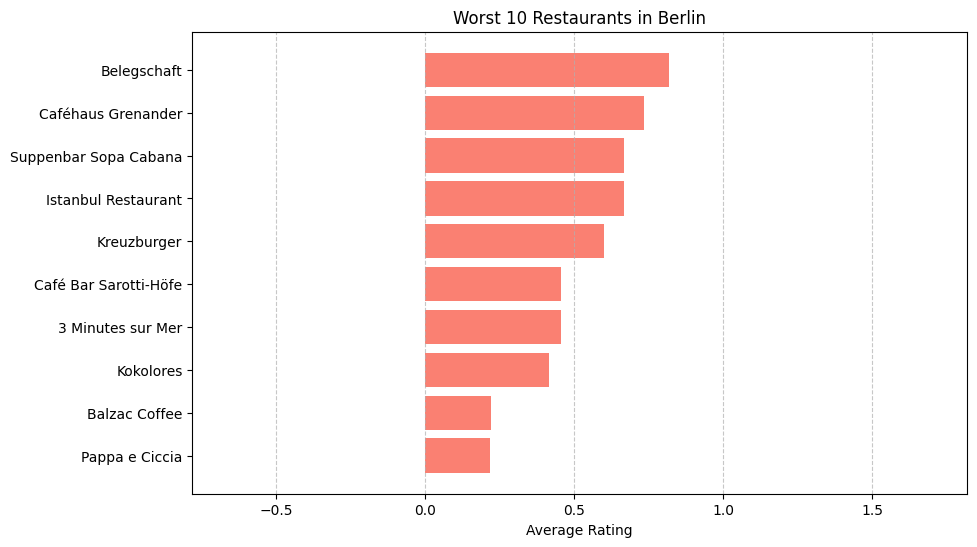

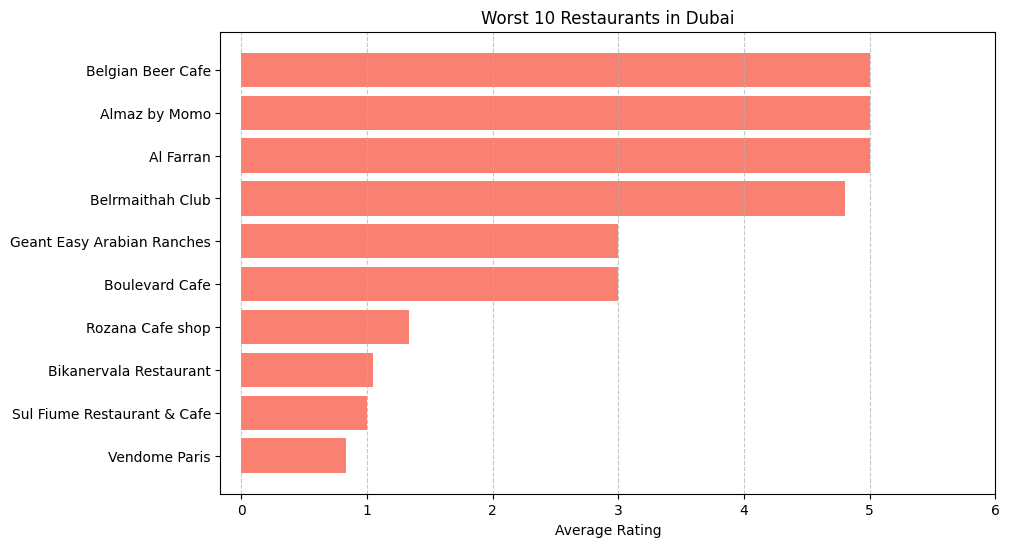

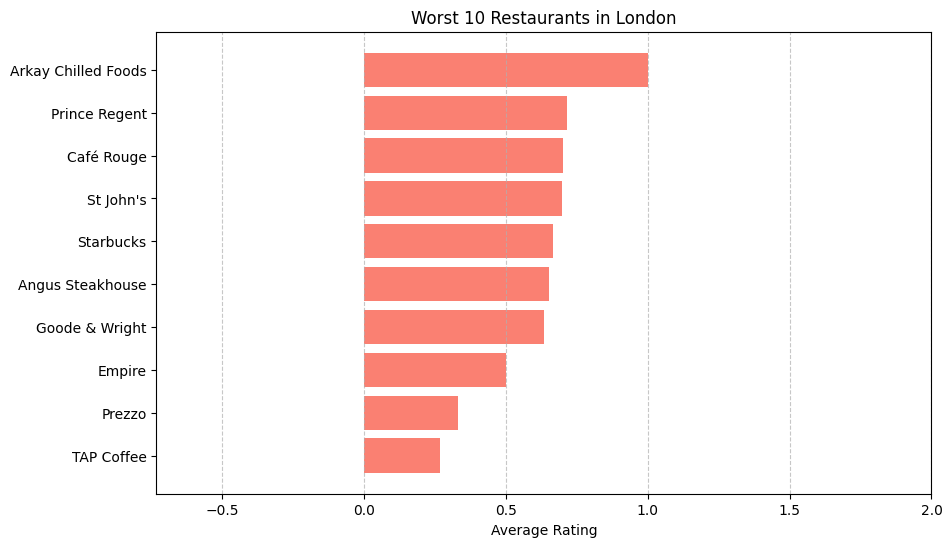

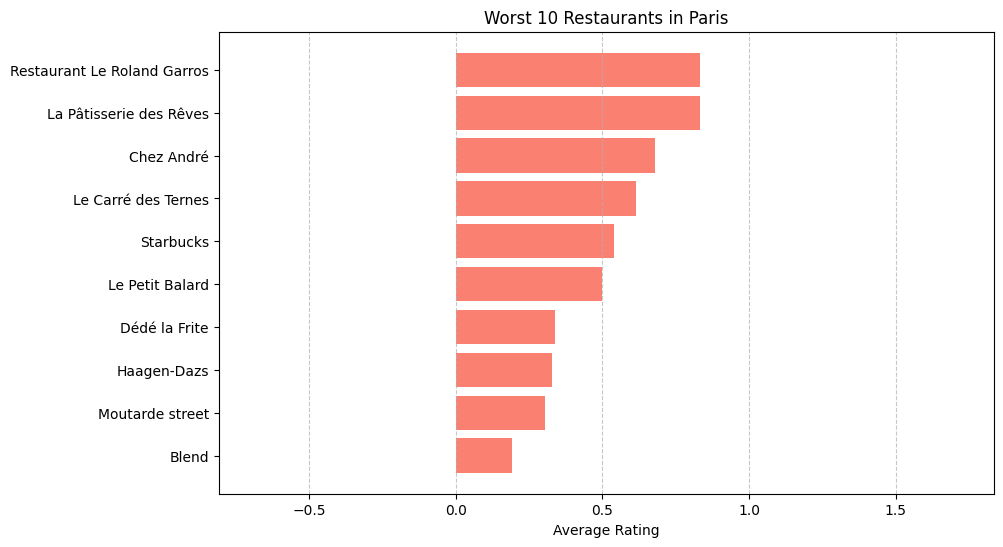

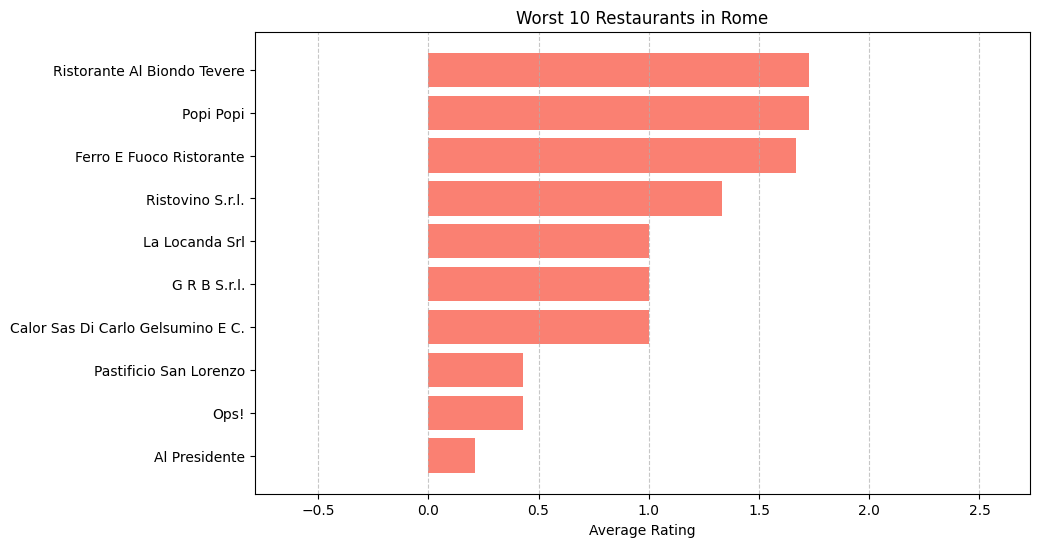

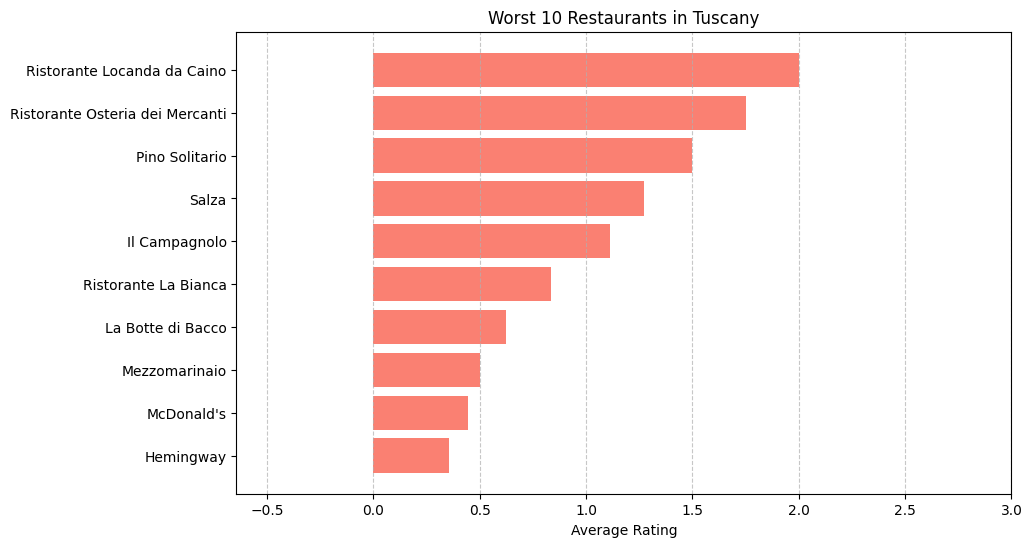

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


a_avg = a.groupby(['location', 'name'], as_index=False)['rating'].mean()

a_avg = a_avg[a_avg['rating'] > 0]

sorted_df = a_avg.sort_values(by=['location', 'rating'], ascending=[True, True])

bottom_10_df = sorted_df.groupby('location').head(10)

locations = bottom_10_df['location'].unique()

for location in locations:
    location_data = bottom_10_df[bottom_10_df['location'] == location]

    plt.figure(figsize=(10, 6))
    plt.barh(location_data['name'], location_data['rating'], color='salmon')
    plt.xlabel('Average Rating')
    plt.title(f'Worst 10 Restaurants in {location}')

    plt.xlim(location_data['rating'].min() - 1, location_data['rating'].max() + 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


<ipython-input-22-4ee2c33170d2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


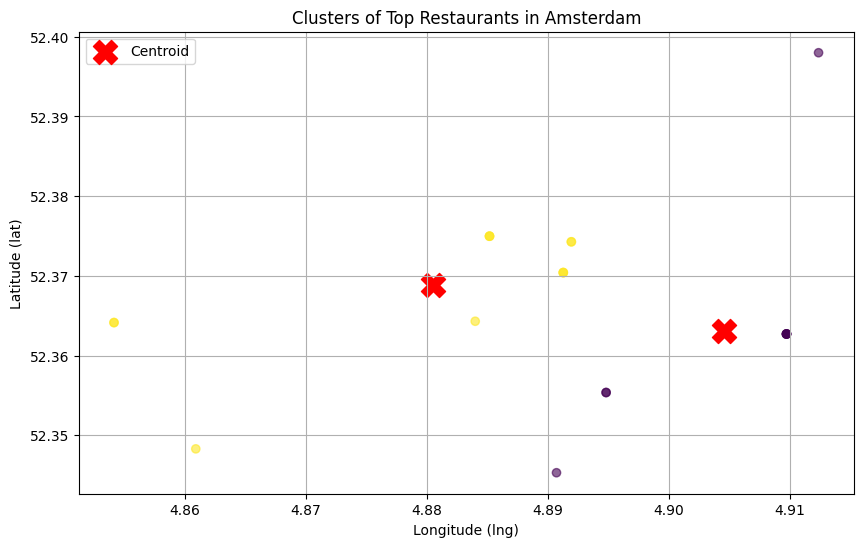

<ipython-input-22-4ee2c33170d2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


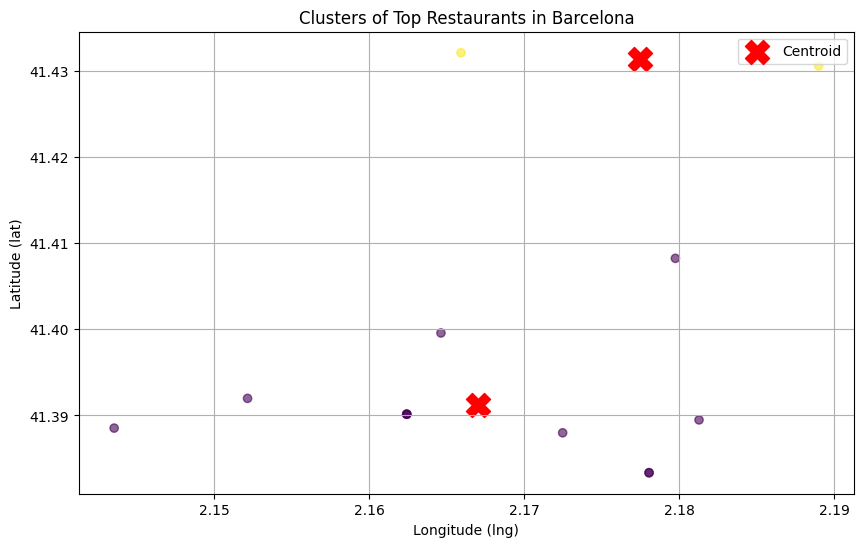

<ipython-input-22-4ee2c33170d2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


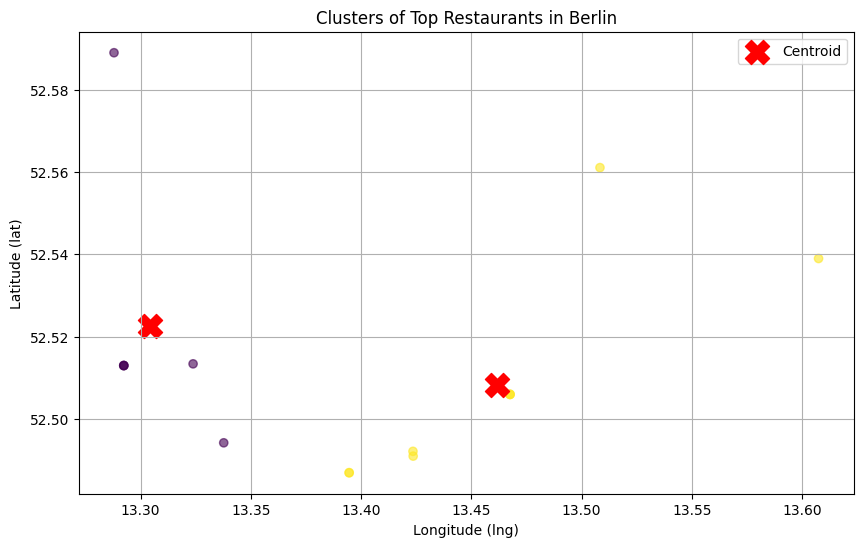

<ipython-input-22-4ee2c33170d2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


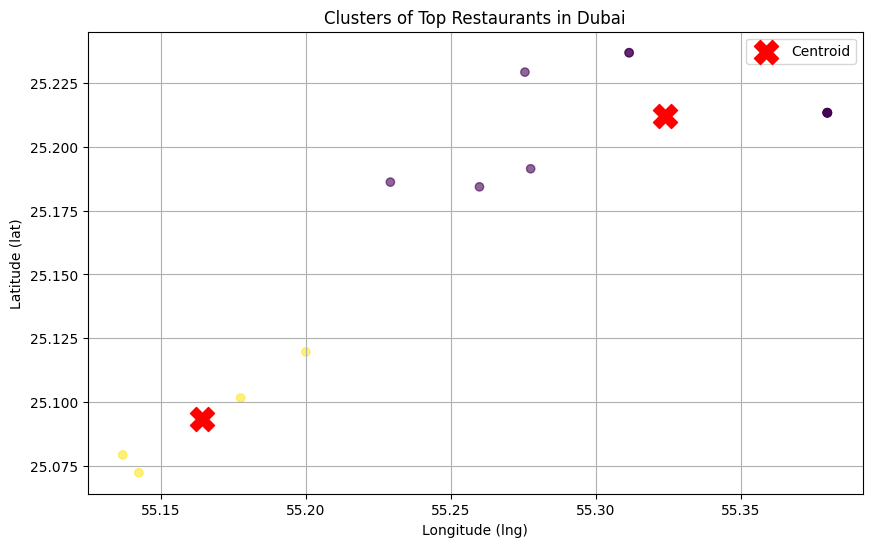

<ipython-input-22-4ee2c33170d2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


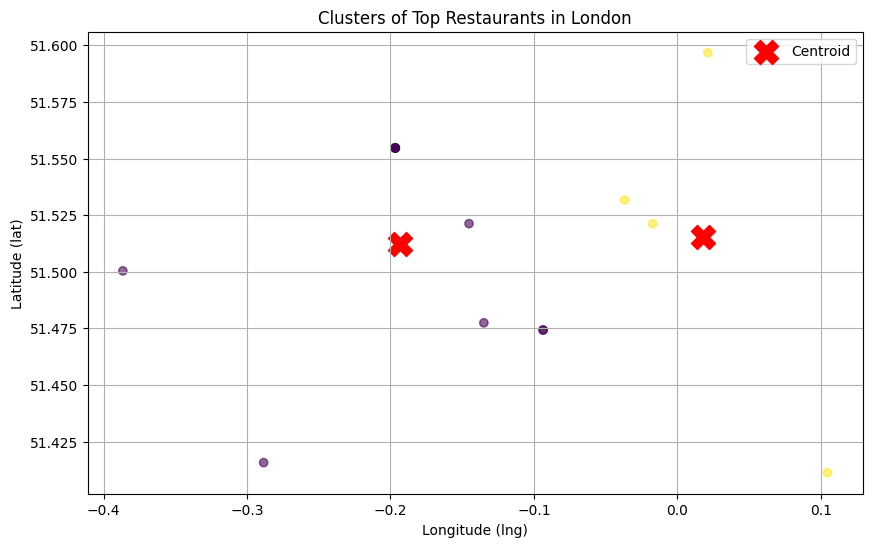

<ipython-input-22-4ee2c33170d2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


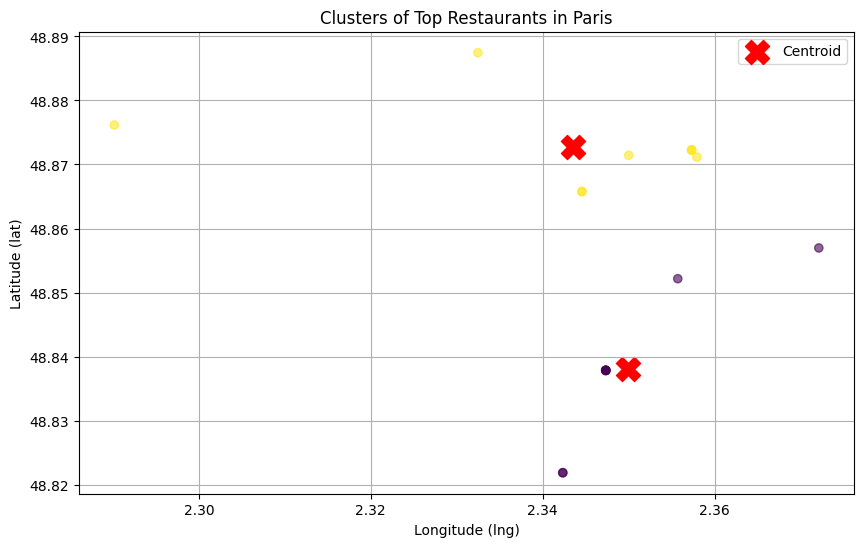

<ipython-input-22-4ee2c33170d2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


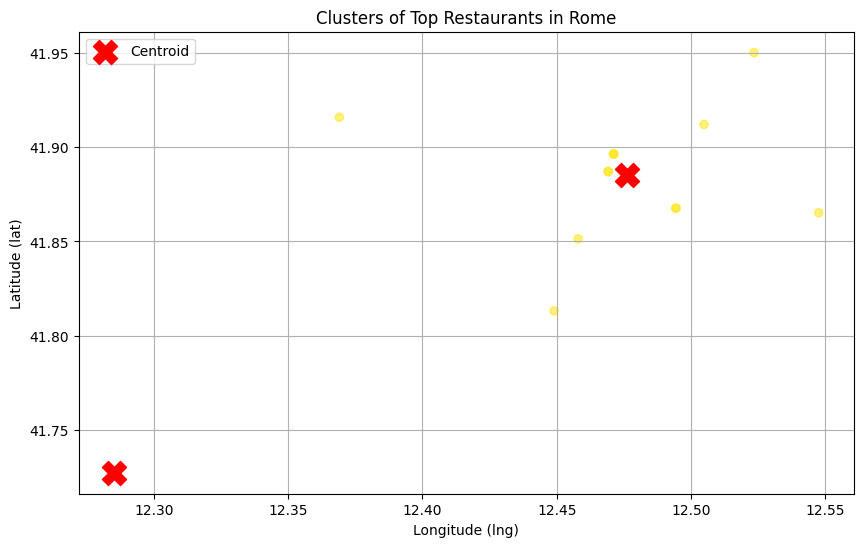

<ipython-input-22-4ee2c33170d2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


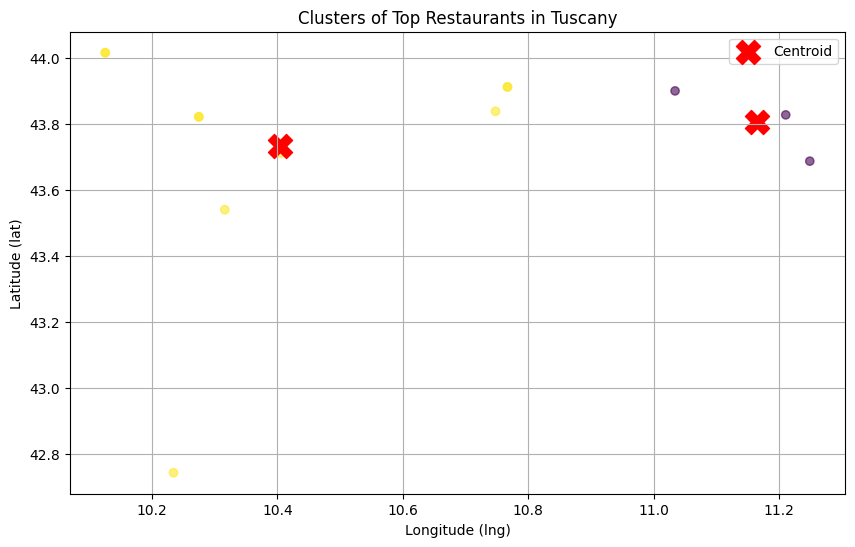

    location  avg_score  silhouette_score  \
0  Amsterdam       5.00          0.405883   
1  Barcelona       5.00          0.566318   
2     Berlin       5.00          0.576042   
3      Dubai       4.78          0.640702   
4     London       5.00          0.467671   
5      Paris       5.00          0.516135   
6       Rome       5.00          0.783472   
7    Tuscany       5.00          0.383659   

                                  avg_coords  
0      (52.36634609523809, 4.89086876190476)  
1      (41.3973603076923, 2.168632923076923)  
2    (52.51404393333333, 13.398753533333332)  
3   (25.180361266666672, 55.281460200000005)  
4  (51.513172133333335, -0.1368872666666667)  
5    (48.85536822222222, 2.3467234444444447)  
6        (41.855524312499995, 12.4405085625)  
7   (43.750806692307684, 10.579311769230769)  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

a_avg = a.groupby(['location', 'name'], as_index=False)['rating'].mean()

a_avg = a_avg[a_avg['rating'] > 0]

locations = a_avg['location'].unique()

results = []

for location in locations:
    top_10_df = a_avg[a_avg['location'] == location].sort_values(by='rating', ascending=False).head(10)

    top_10_coords = top_10_df.merge(a[['name', 'location', 'lat', 'lng']], on=['name', 'location'], how='left')

    coords = top_10_coords[['lat', 'lng']]

    if len(coords) < 2:
        print(f"Not enough data points for clustering in {location}.")
        continue

    n_clusters = min(2, len(coords))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(coords)

    coords['cluster'] = labels

    silhouette_avg = silhouette_score(coords[['lat', 'lng']], labels) if n_clusters > 1 else None

    avg_score = top_10_df['rating'].mean()

    avg_lat = coords['lat'].mean()
    avg_lng = coords['lng'].mean()
    avg_coords = (avg_lat, avg_lng)
    results.append({
        'location': location,
        'avg_score': avg_score,
        'silhouette_score': silhouette_avg,
        'avg_coords': avg_coords
    })

    plt.figure(figsize=(10, 6))
    plt.scatter(coords['lng'], coords['lat'], c=labels, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', marker='X', label='Centroid')  # Centroid
    plt.title(f'Clusters of Top Restaurants in {location}')
    plt.xlabel('Longitude (lng)')
    plt.ylabel('Latitude (lat)')
    plt.grid(True)
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results)

print(results_df)


If the traveler wants to go to the best restuarant they should go to that particular (lat,long) location


In [ ]:
b = pd.read_csv('Accomodations.csv')
sheet = sheets.InteractiveSheet(df=b)

https://docs.google.com/spreadsheets/d/1c84gecchyD3qkul4M3AJ4kX3_5K9_QgQXAXNUcwCGX8#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


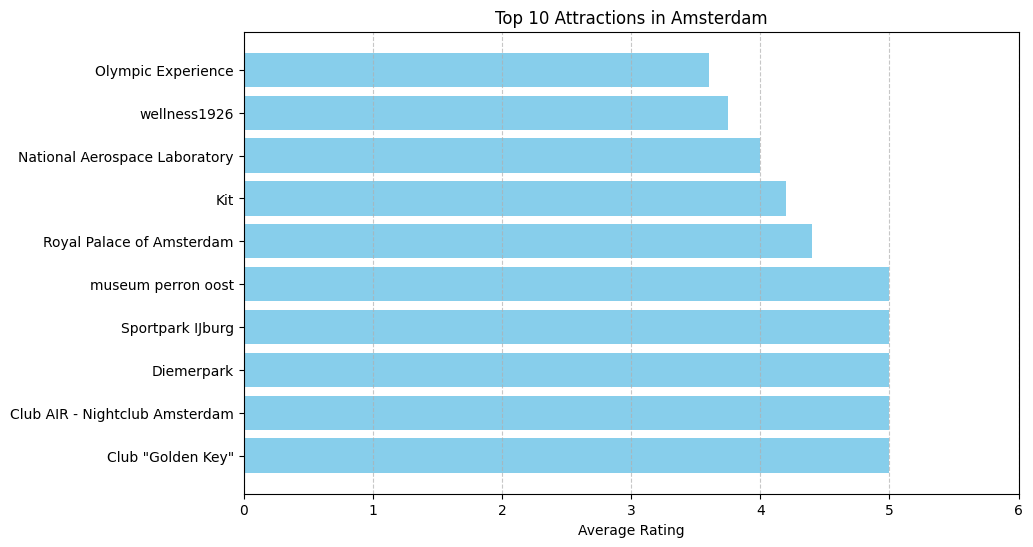

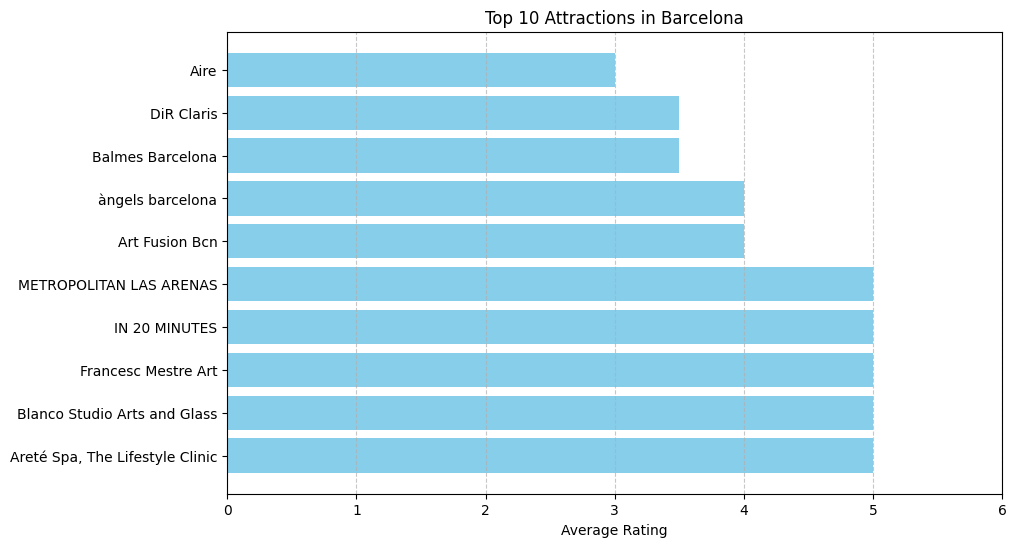

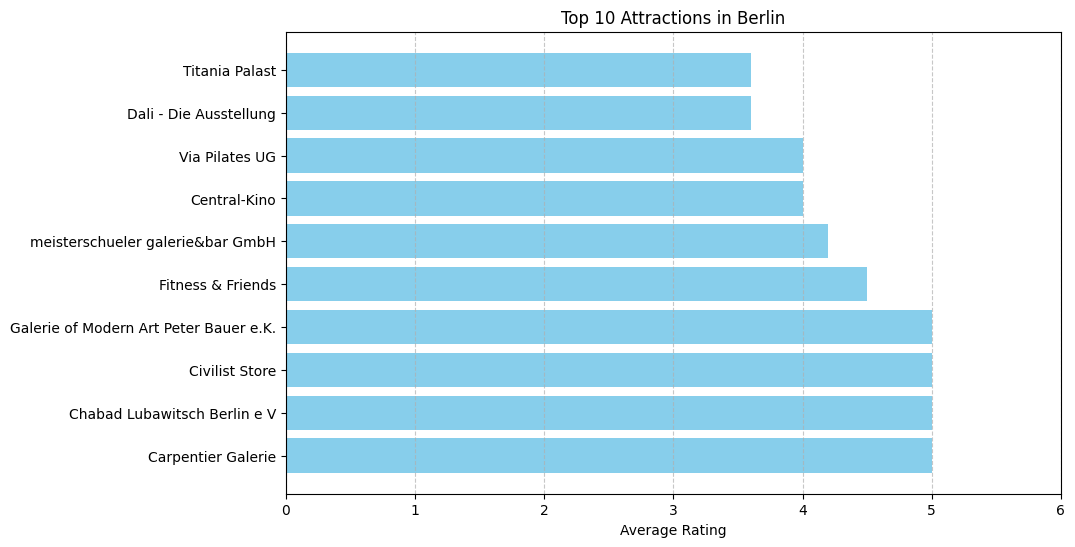

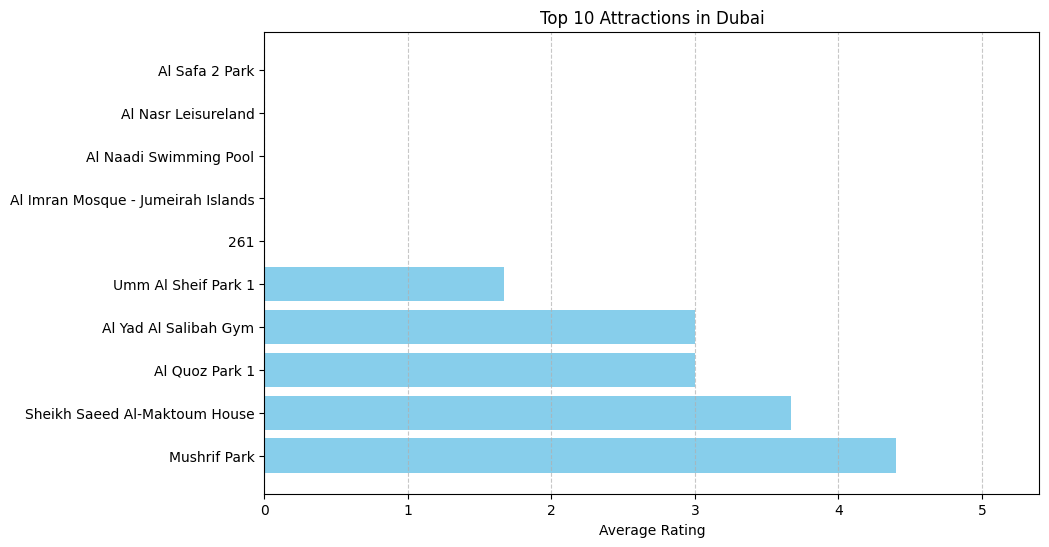

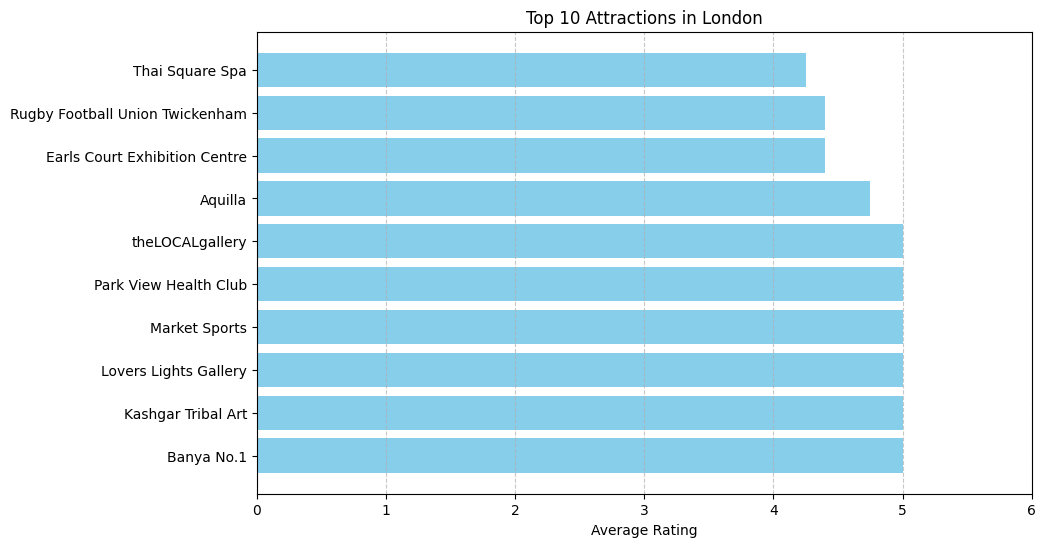

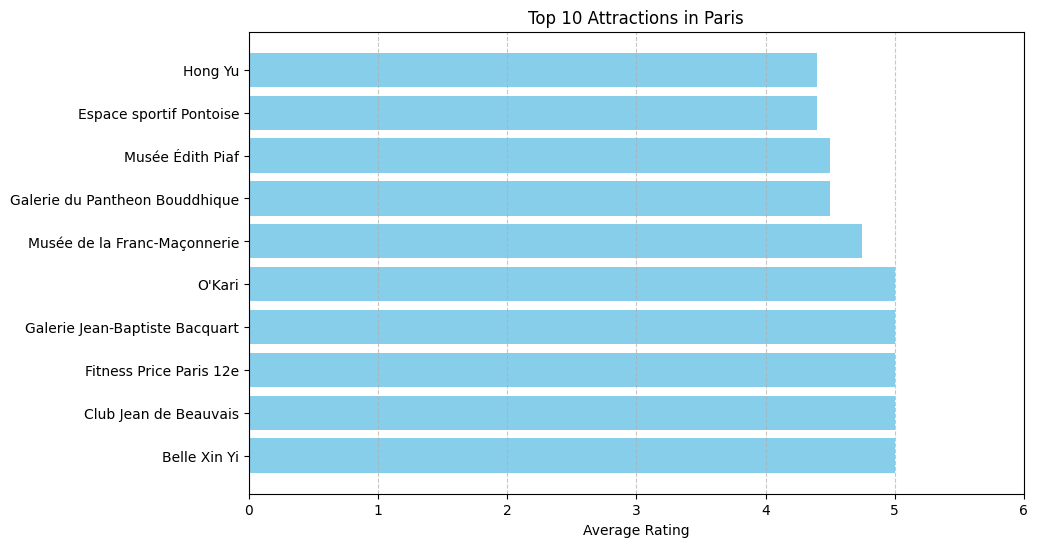

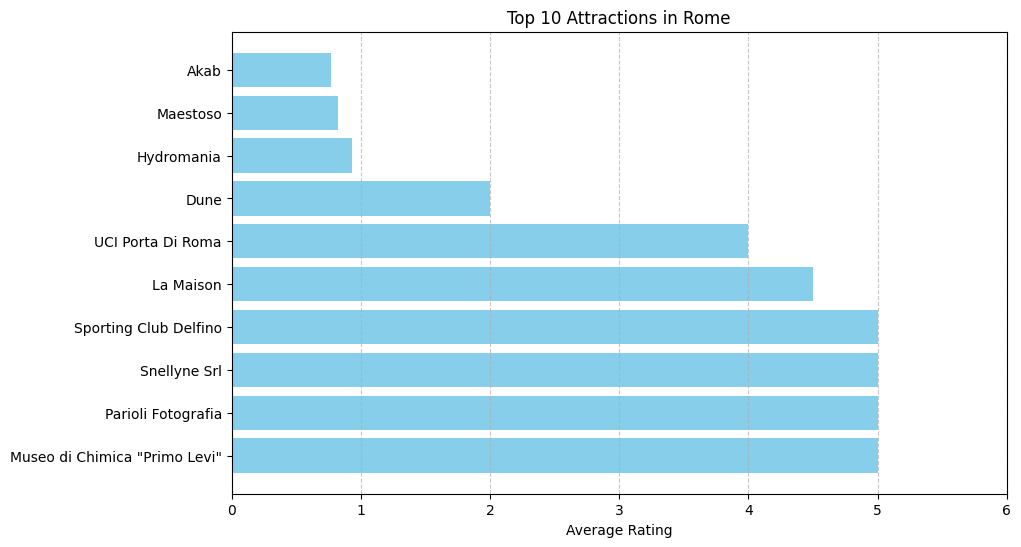

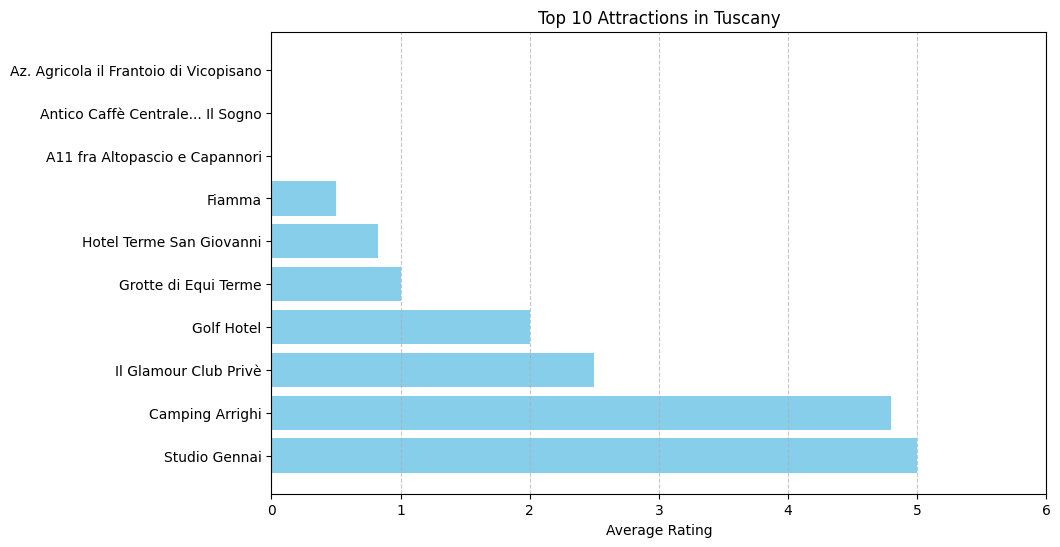

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


b_avg = b.groupby(['location', 'name'], as_index=False)['rating'].mean()

sorted_df = b_avg.sort_values(by=['location', 'rating'], ascending=[True, False])

top_10_df = sorted_df.groupby('location').head(10)

locations = top_10_df['location'].unique()

for location in locations:
    location_data = top_10_df[top_10_df['location'] == location]

    plt.figure(figsize=(10, 6))
    plt.barh(location_data['name'], location_data['rating'], color='skyblue')
    plt.xlabel('Average Rating')
    plt.title(f'Top 10 Attractions in {location}')
    plt.xlim(0, location_data['rating'].max() + 1)  # Adjust xlim for better spacing
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


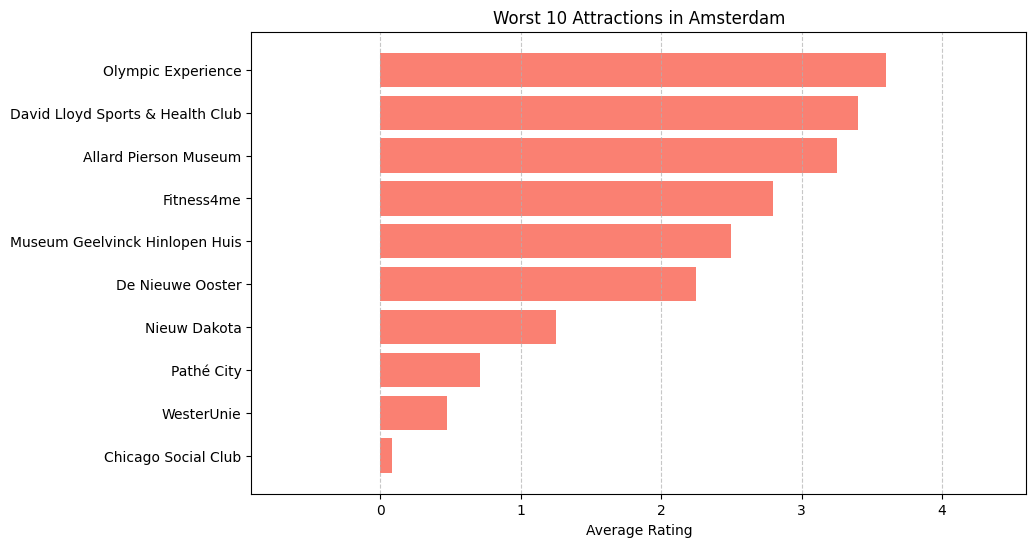

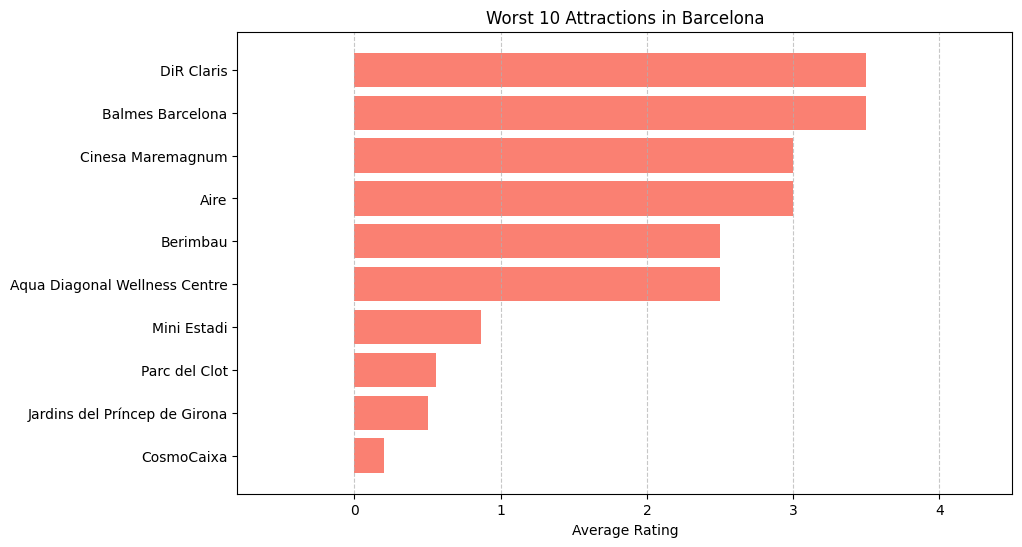

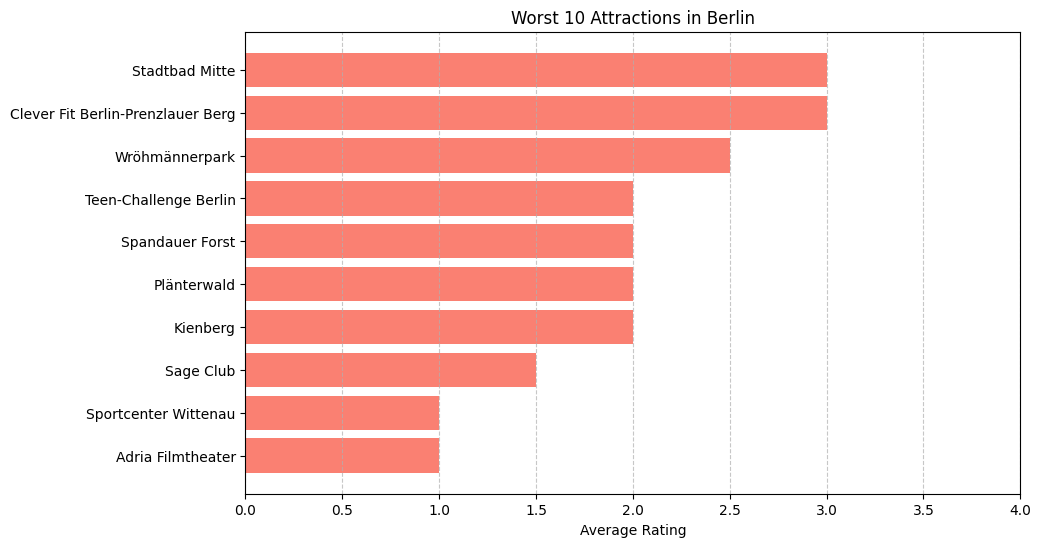

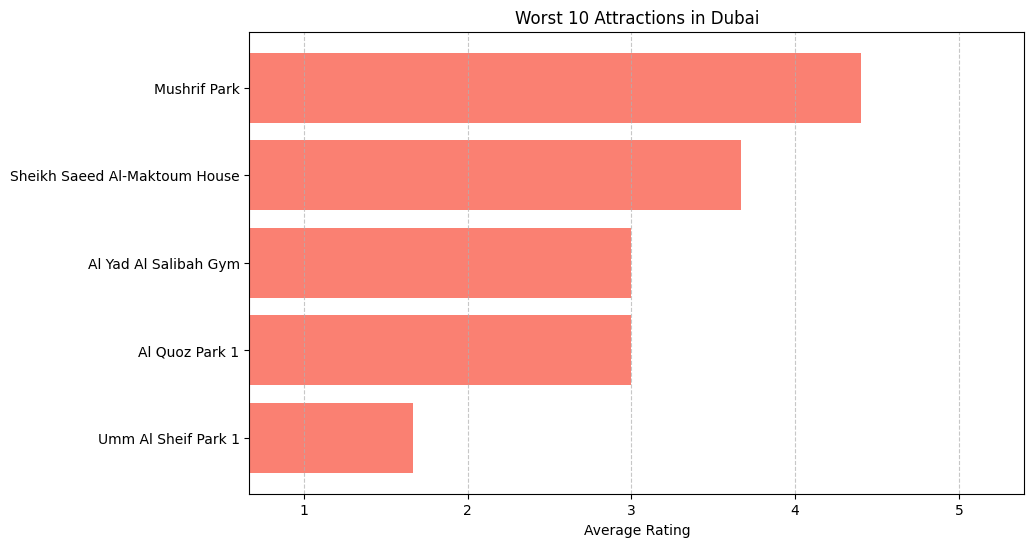

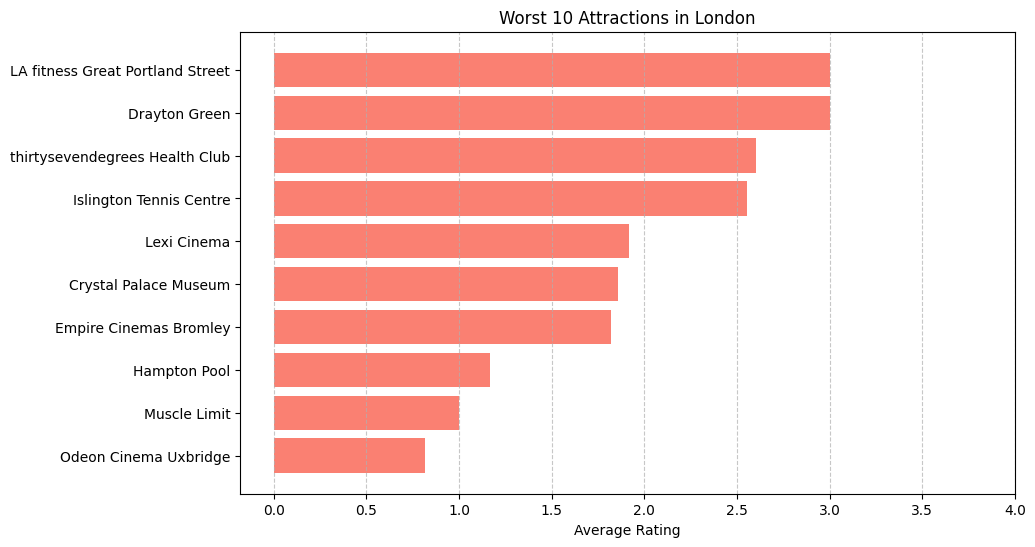

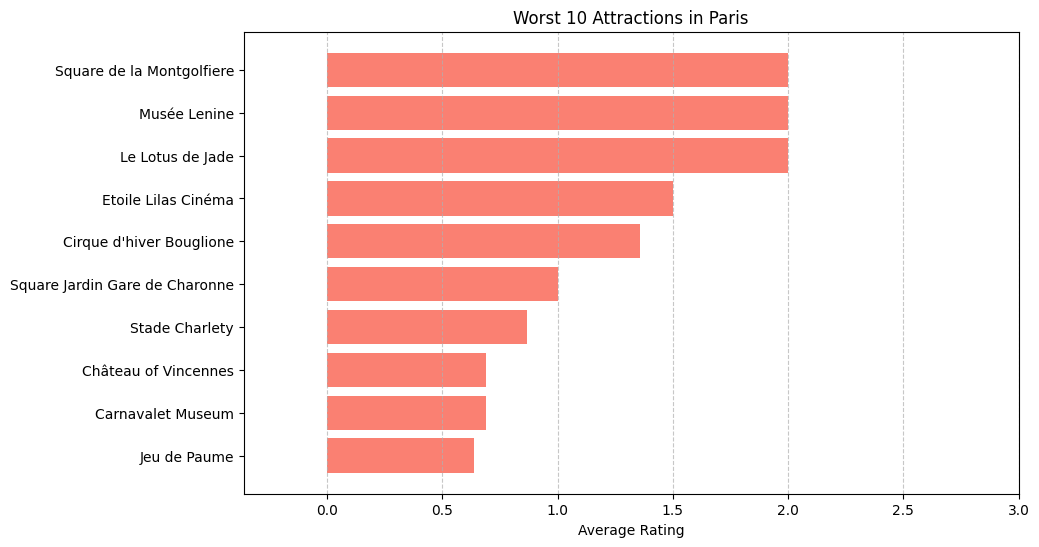

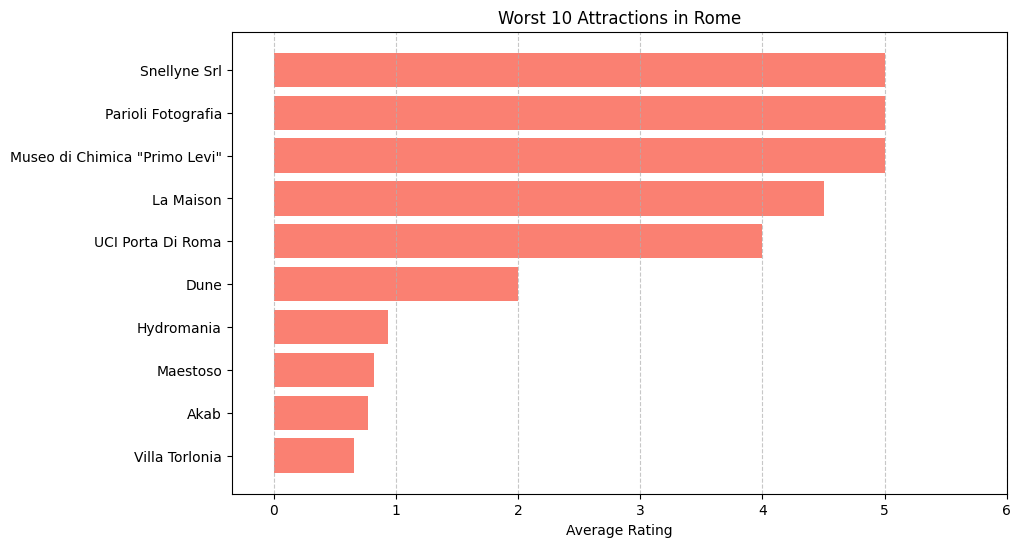

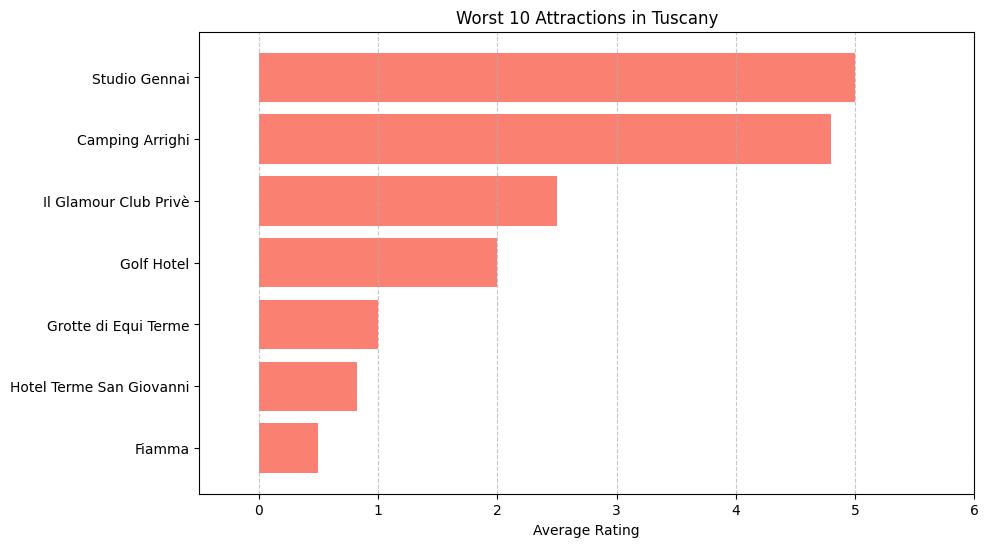

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


b_avg = b.groupby(['location', 'name'], as_index=False)['rating'].mean()

b_avg = b_avg[b_avg['rating'] > 0]

sorted_df = b_avg.sort_values(by=['location', 'rating'], ascending=[True, True])

bottom_10_df = sorted_df.groupby('location').head(10)

locations = bottom_10_df['location'].unique()

for location in locations:
    location_data = bottom_10_df[bottom_10_df['location'] == location]

    plt.figure(figsize=(10, 6))
    plt.barh(location_data['name'], location_data['rating'], color='salmon')
    plt.xlabel('Average Rating')
    plt.title(f'Worst 10 Attractions in {location}')

    plt.xlim(location_data['rating'].min() - 1, location_data['rating'].max() + 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


<ipython-input-26-1a5085fea909>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


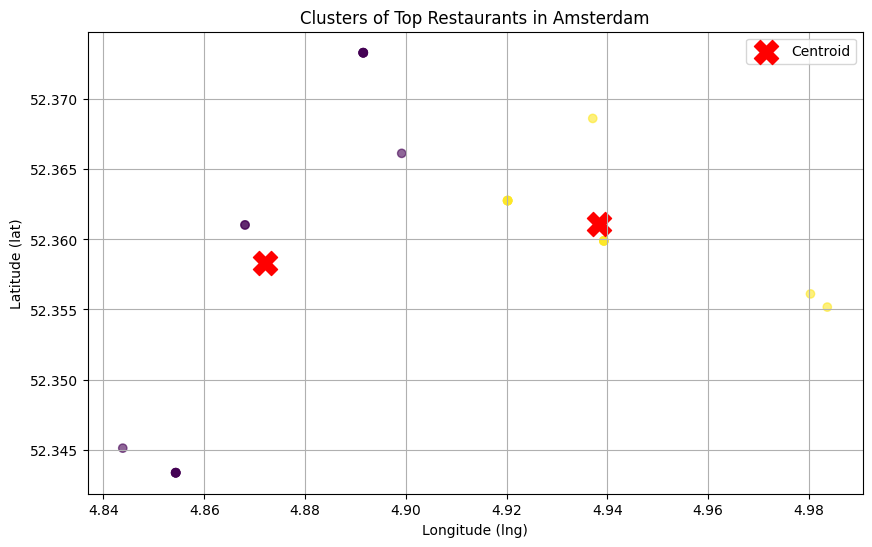

<ipython-input-26-1a5085fea909>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


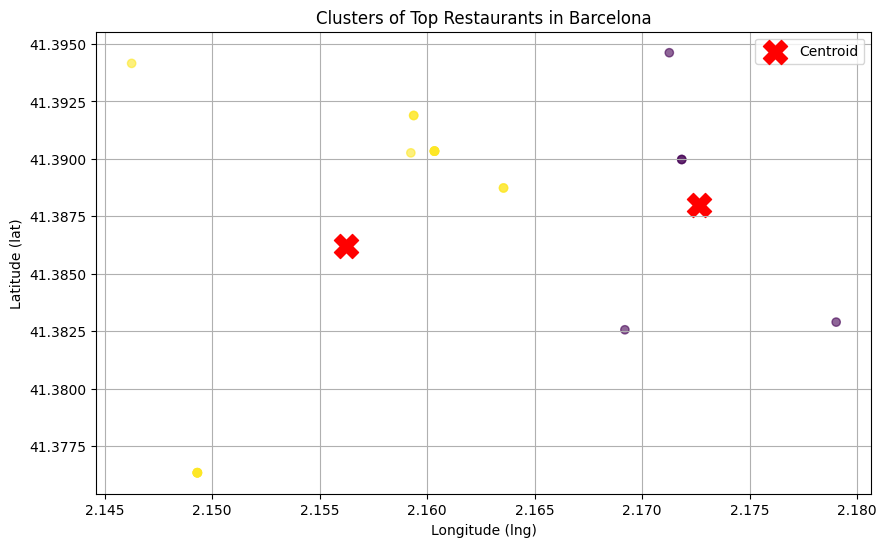

<ipython-input-26-1a5085fea909>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


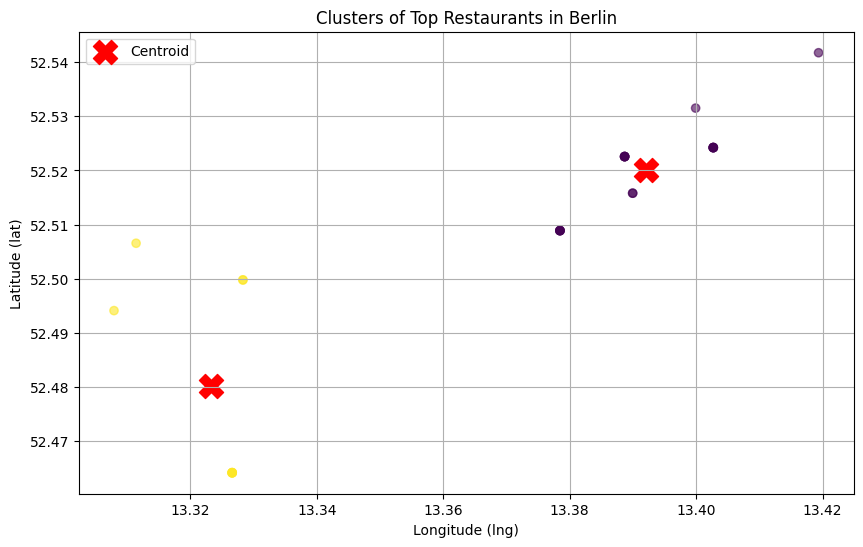

<ipython-input-26-1a5085fea909>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


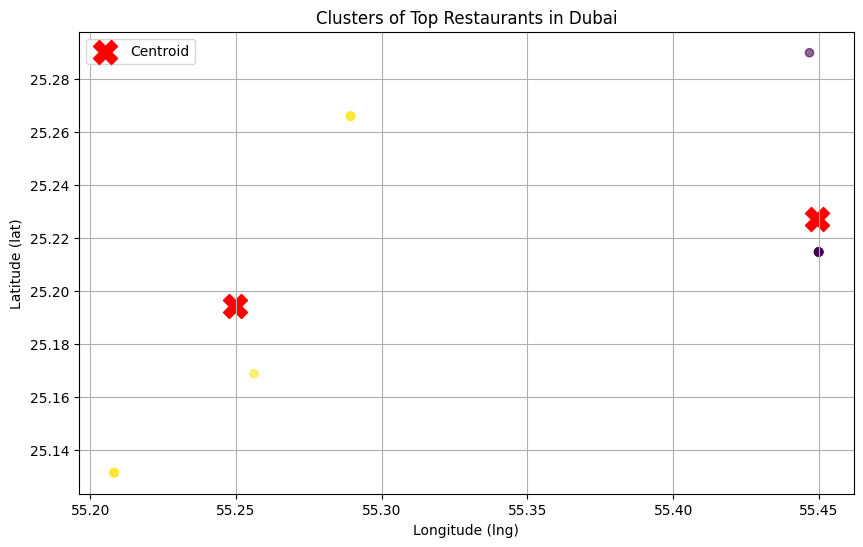

<ipython-input-26-1a5085fea909>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


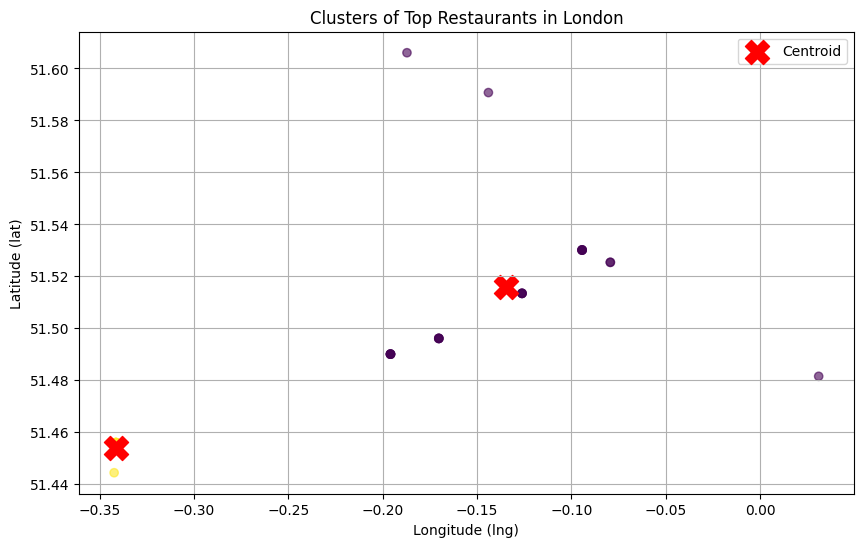

<ipython-input-26-1a5085fea909>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


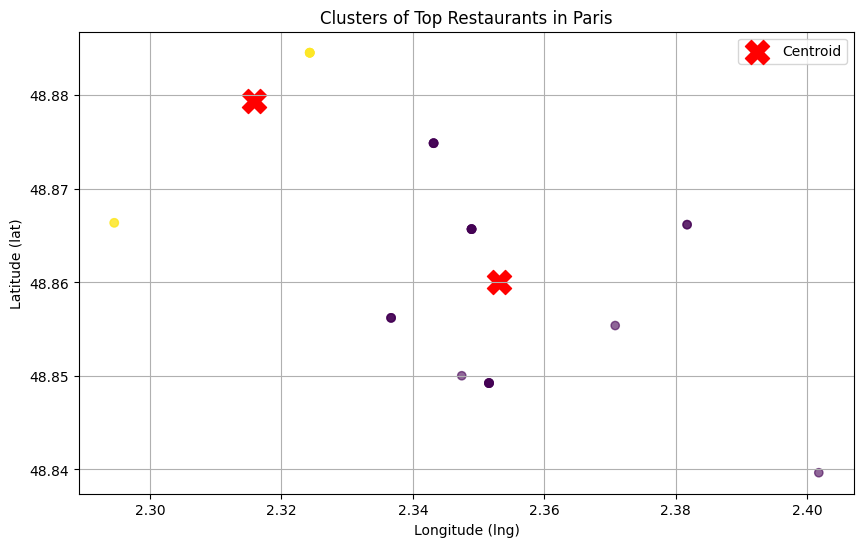

<ipython-input-26-1a5085fea909>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


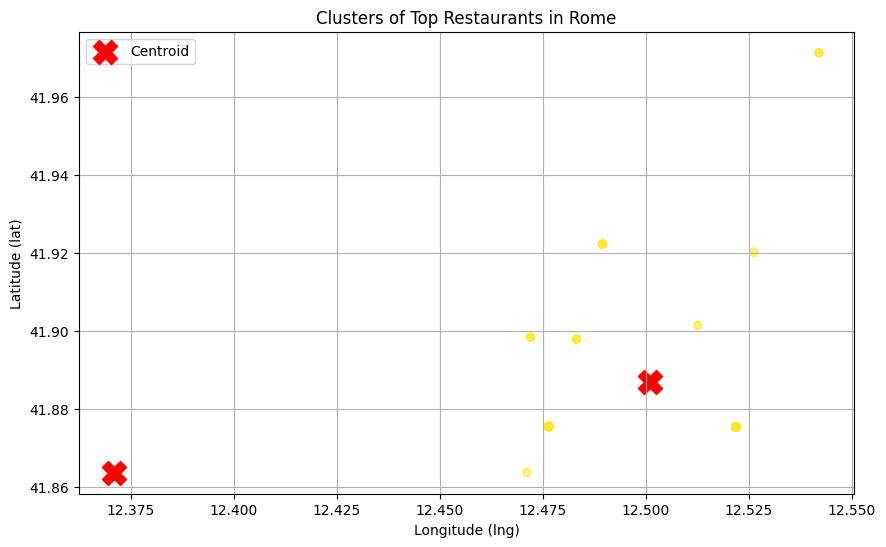

<ipython-input-26-1a5085fea909>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


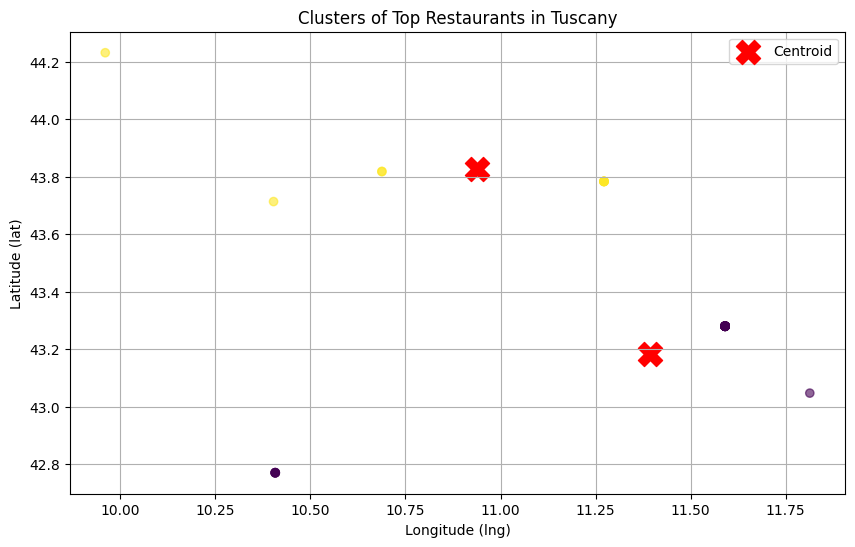

    location  avg_score  silhouette_score  \
0  Amsterdam   4.495000          0.599225   
1  Barcelona   4.300000          0.436590   
2     Berlin   4.390000          0.765960   
3      Dubai   3.146667          0.704997   
4     London   4.780000          0.719692   
5      Paris   4.755000          0.527243   
6       Rome   3.302609          0.788386   
7    Tuscany   2.375155          0.578308   

                                avg_coords  
0   (52.35961842307693, 4.902606961538462)  
1   (41.38662114285715, 2.160129238095239)  
2  (52.50731335714287, 13.369923499999997)  
3  (25.209617000000005, 55.34191338461537)  
4  (51.5032214137931, -0.1774430344827586)  
5  (48.86468137931033, 2.3441126206896556)  
6  (41.88072778947369, 12.466691175438596)  
7  (43.34940176923079, 11.277223230769234)  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

b_avg = b.groupby(['location', 'name'], as_index=False)['rating'].mean()

b_avg = b_avg[b_avg['rating'] > 0]

locations = b_avg['location'].unique()

results = []

for location in locations:
    top_10_df = b_avg[b_avg['location'] == location].sort_values(by='rating', ascending=False).head(10)

    top_10_coords = top_10_df.merge(b[['name', 'location', 'lat', 'lng']], on=['name', 'location'], how='left')

    coords = top_10_coords[['lat', 'lng']]

    if len(coords) < 2:
        print(f"Not enough data points for clustering in {location}.")
        continue

    n_clusters = min(2, len(coords))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(coords)

    coords['cluster'] = labels

    silhouette_avg = silhouette_score(coords[['lat', 'lng']], labels) if n_clusters > 1 else None

    avg_score = top_10_df['rating'].mean()

    avg_lat = coords['lat'].mean()
    avg_lng = coords['lng'].mean()
    avg_coords = (avg_lat, avg_lng)
    results.append({
        'location': location,
        'avg_score': avg_score,
        'silhouette_score': silhouette_avg,
        'avg_coords': avg_coords
    })

    plt.figure(figsize=(10, 6))
    plt.scatter(coords['lng'], coords['lat'], c=labels, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', marker='X', label='Centroid')  # Centroid
    plt.title(f'Clusters of Top Restaurants in {location}')
    plt.xlabel('Longitude (lng)')
    plt.ylabel('Latitude (lat)')
    plt.grid(True)
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results)

print(results_df)


In [ ]:
c = pd.read_csv('POI.csv')
sheet = sheets.InteractiveSheet(df=c)

https://docs.google.com/spreadsheets/d/1Btrd7kcaPh5C2RbAvXdEHf4Pma7CdpMP9WHjILvZ6tY#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


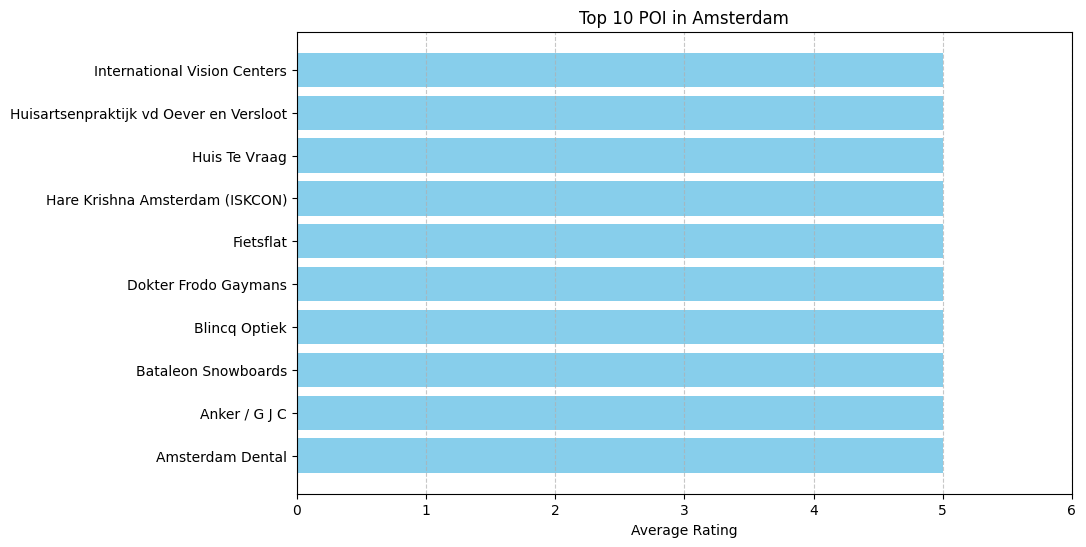

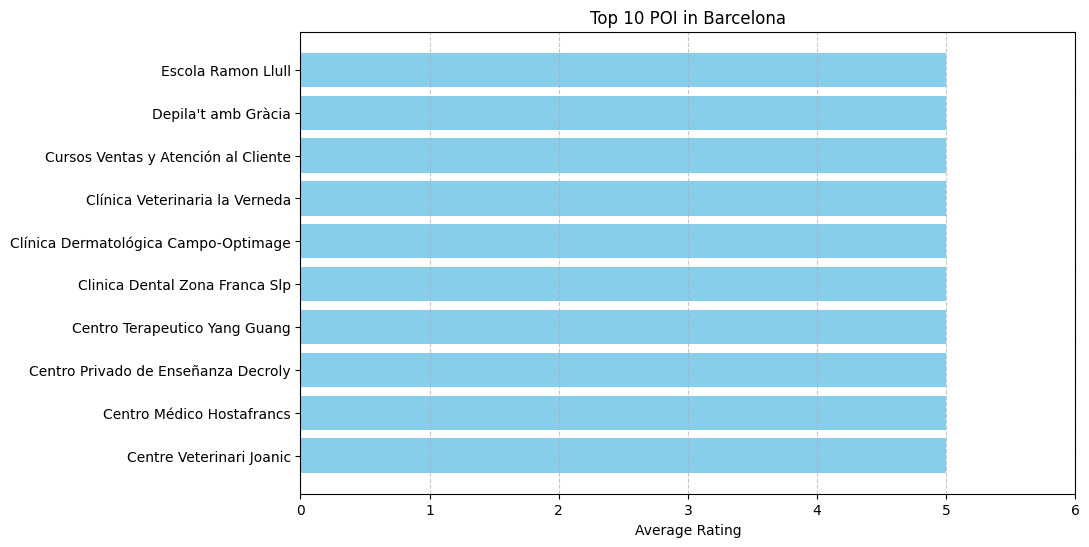

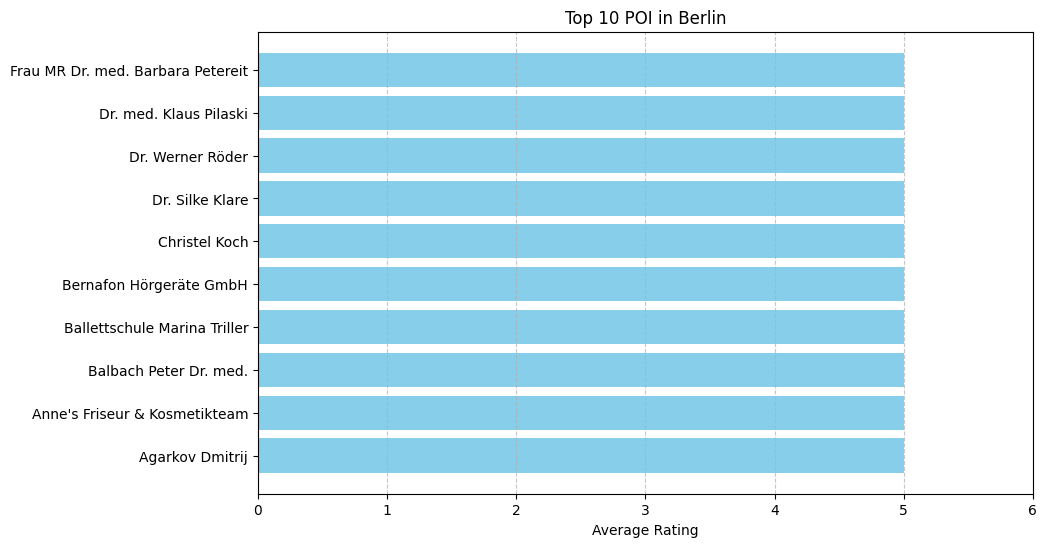

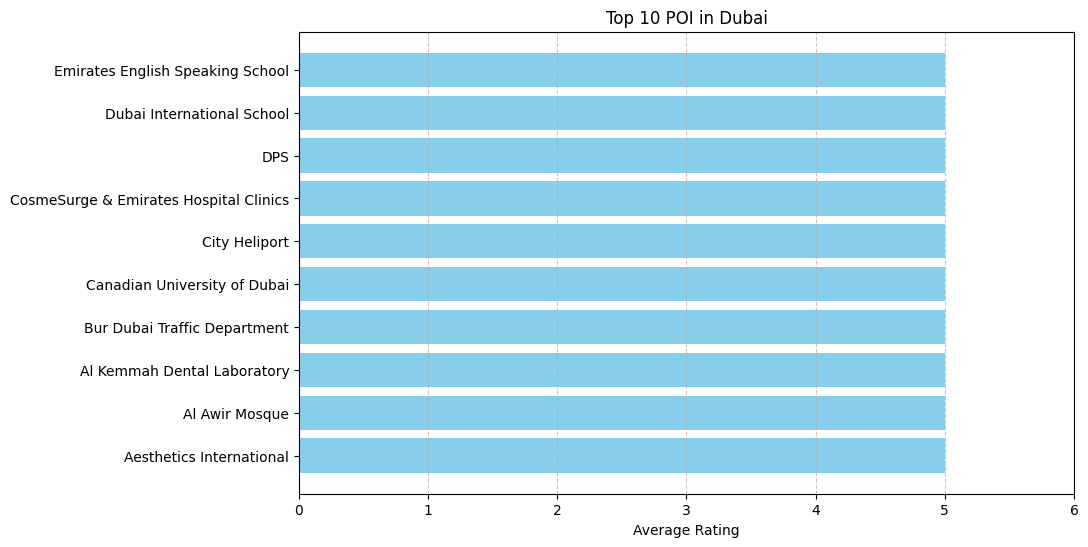

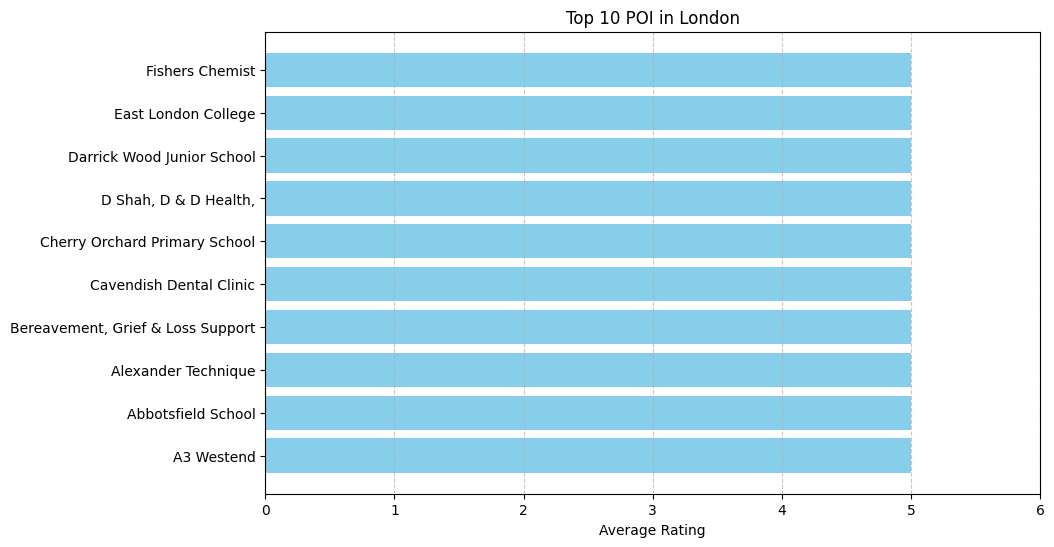

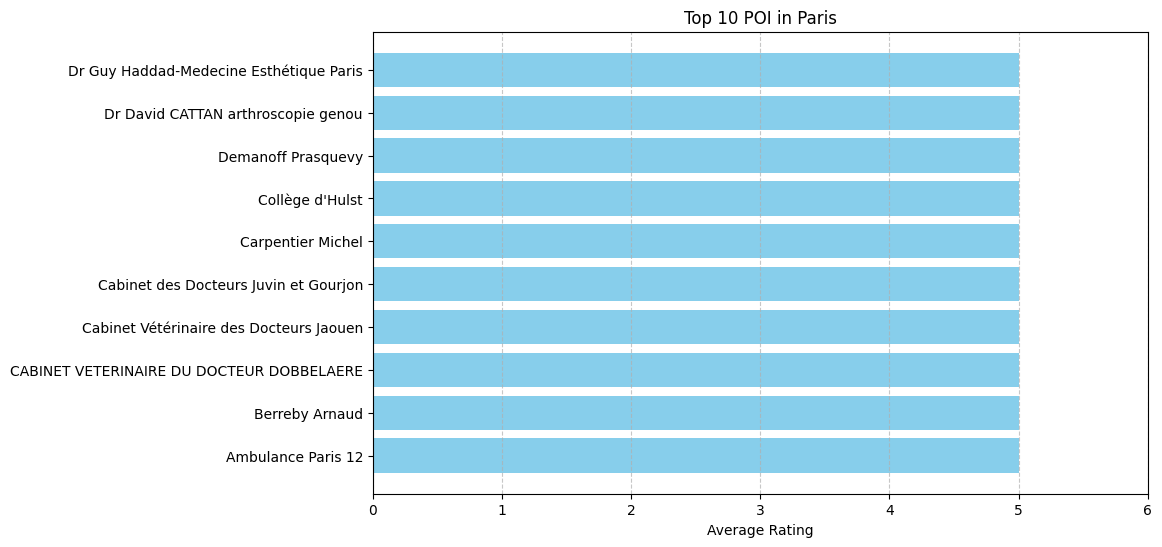

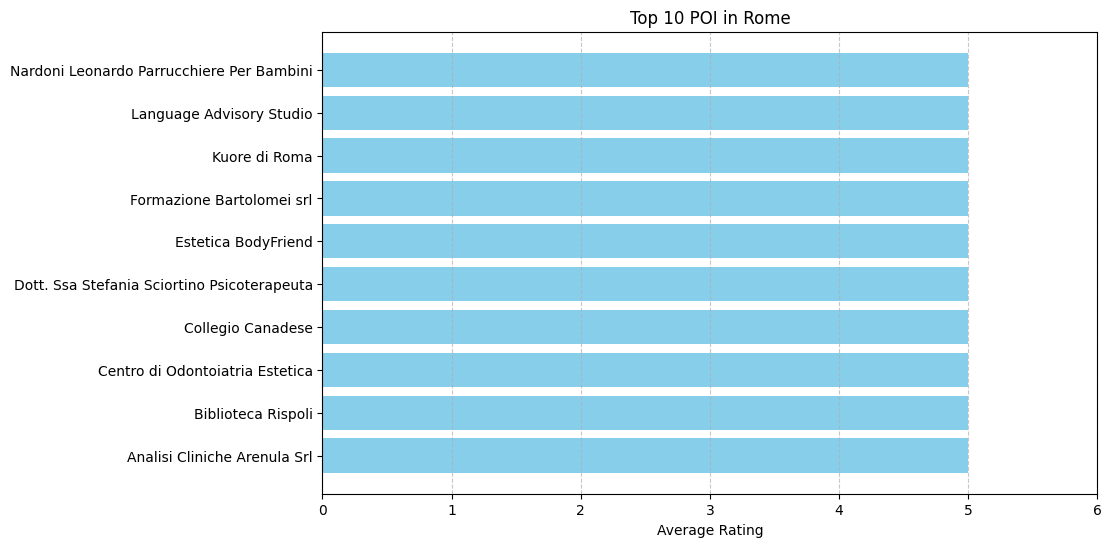

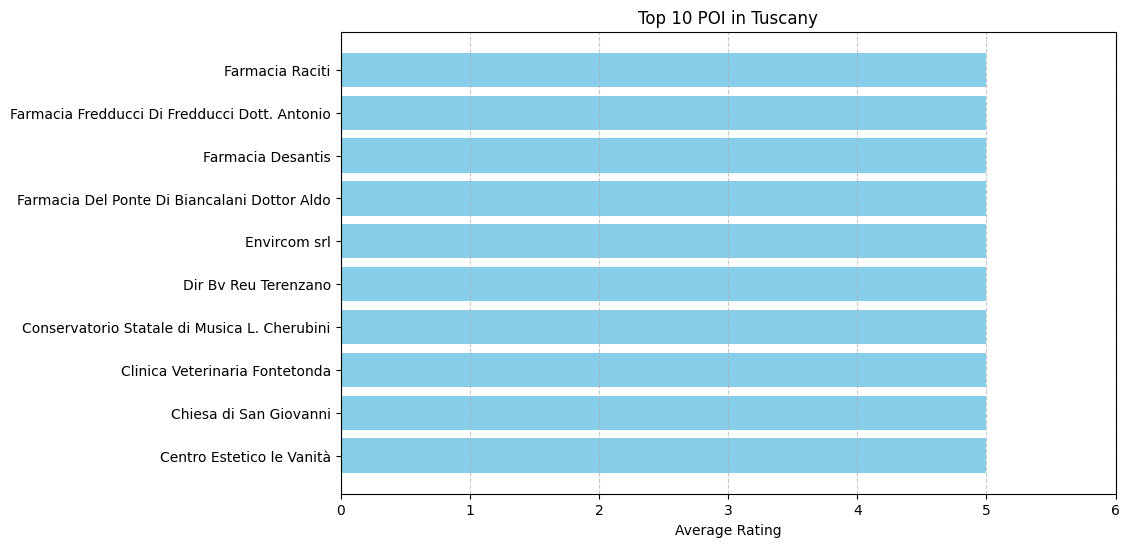

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


c_avg = c.groupby(['location', 'name'], as_index=False)['rating'].mean()

sorted_df = c_avg.sort_values(by=['location', 'rating'], ascending=[True, False])

top_10_df = sorted_df.groupby('location').head(10)

locations = top_10_df['location'].unique()

for location in locations:
    location_data = top_10_df[top_10_df['location'] == location]

    plt.figure(figsize=(10, 6))
    plt.barh(location_data['name'], location_data['rating'], color='skyblue')
    plt.xlabel('Average Rating')
    plt.title(f'Top 10 POI in {location}')
    plt.xlim(0, location_data['rating'].max() + 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


<ipython-input-32-cbdb389798e8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


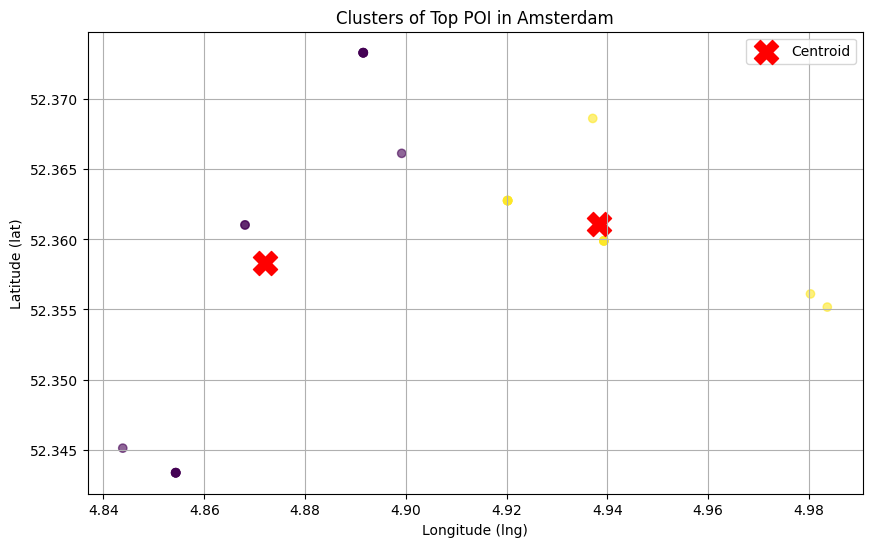

<ipython-input-32-cbdb389798e8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


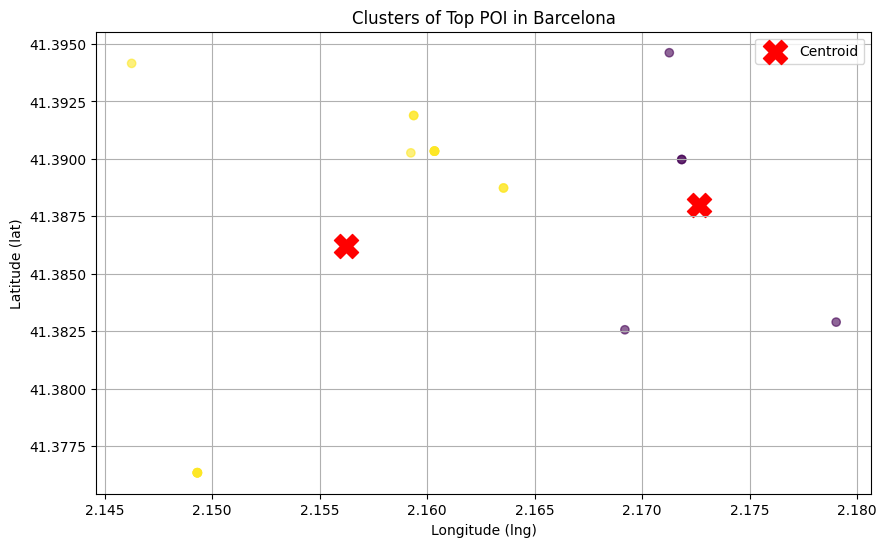

<ipython-input-32-cbdb389798e8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


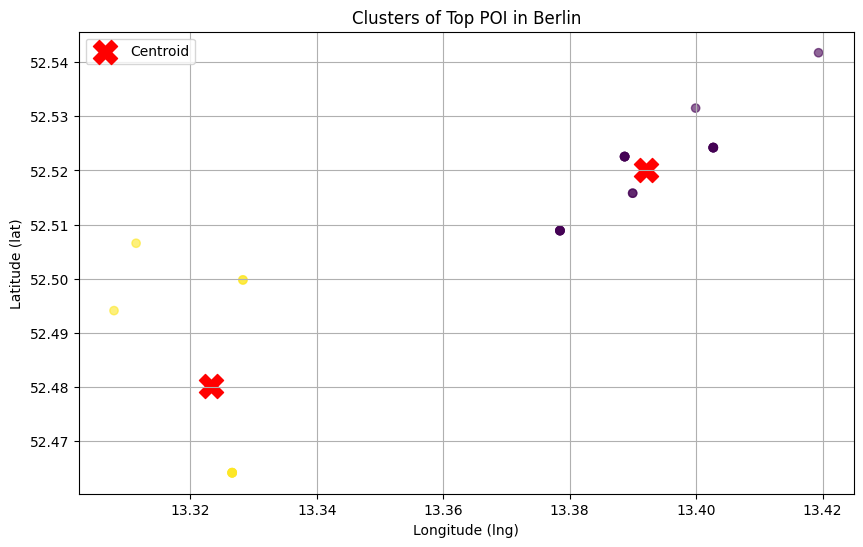

<ipython-input-32-cbdb389798e8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


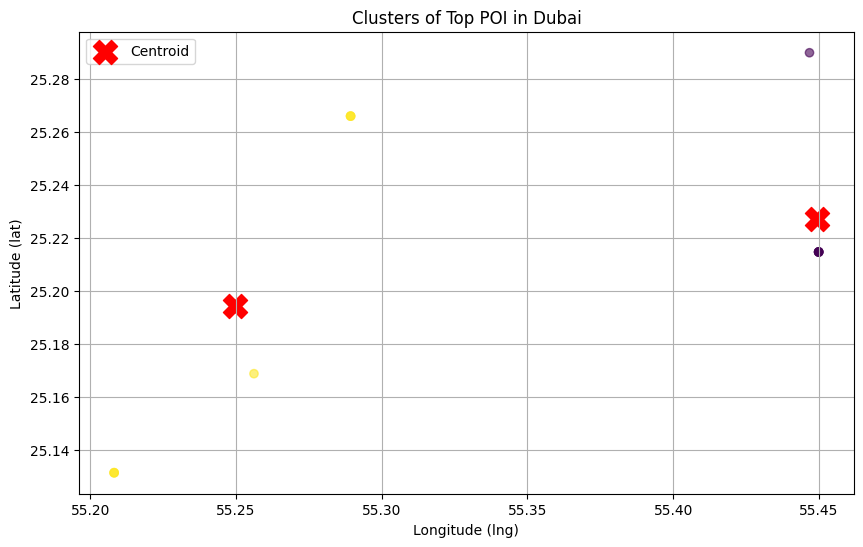

<ipython-input-32-cbdb389798e8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


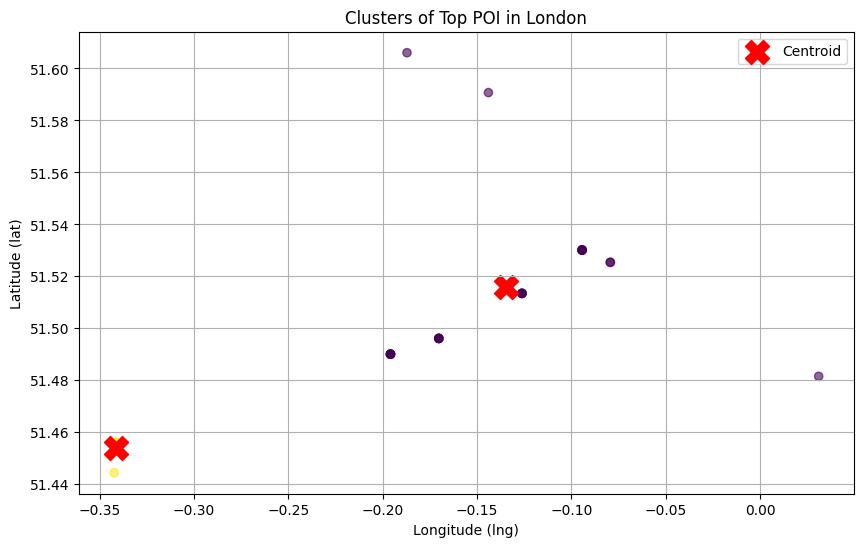

<ipython-input-32-cbdb389798e8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


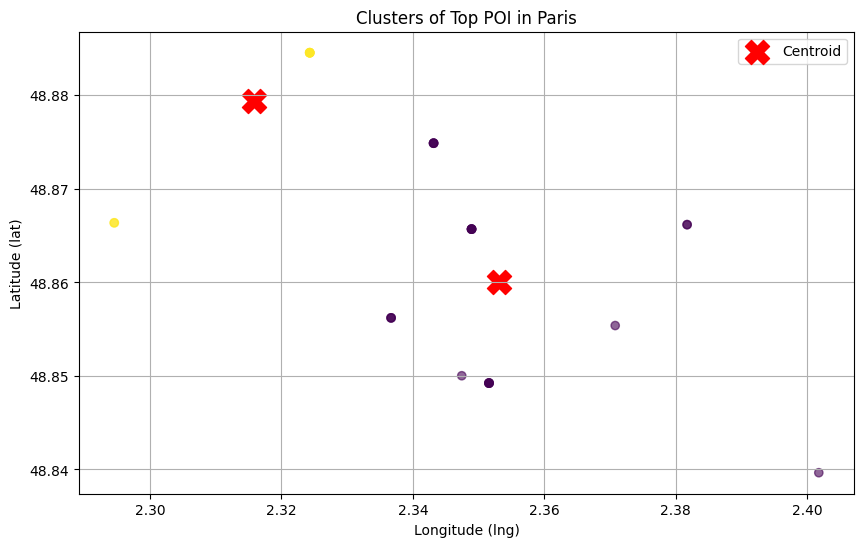

<ipython-input-32-cbdb389798e8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


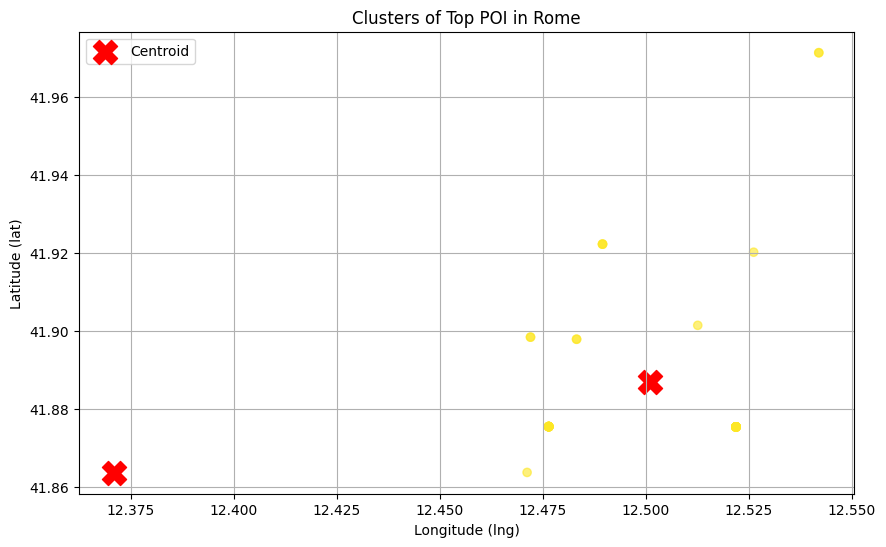

<ipython-input-32-cbdb389798e8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


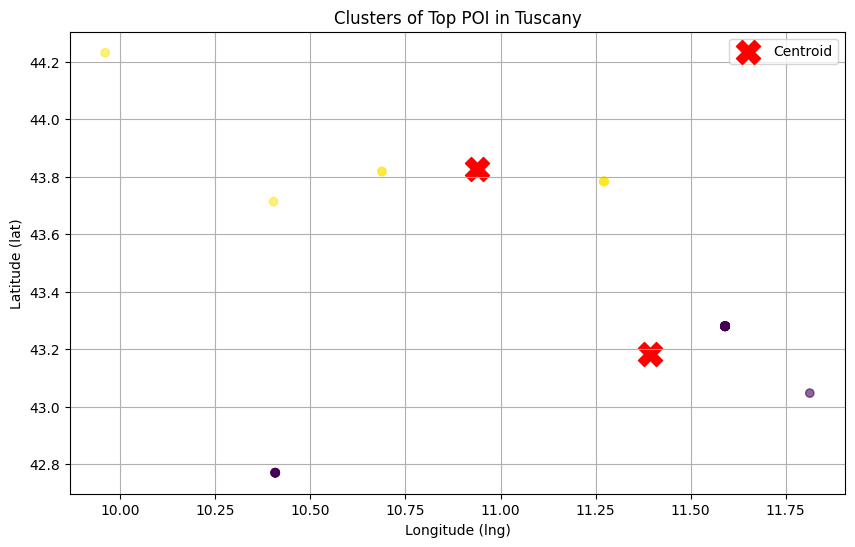

    location  avg_score  silhouette_score  \
0  Amsterdam   4.495000          0.599225   
1  Barcelona   4.300000          0.436590   
2     Berlin   4.390000          0.765960   
3      Dubai   3.146667          0.704997   
4     London   4.780000          0.719692   
5      Paris   4.755000          0.527243   
6       Rome   3.302609          0.788386   
7    Tuscany   2.375155          0.578308   

                                avg_coords  
0   (52.35961842307693, 4.902606961538462)  
1   (41.38662114285715, 2.160129238095239)  
2  (52.50731335714287, 13.369923499999997)  
3  (25.209617000000005, 55.34191338461537)  
4  (51.5032214137931, -0.1774430344827586)  
5  (48.86468137931033, 2.3441126206896556)  
6  (41.88072778947369, 12.466691175438596)  
7  (43.34940176923079, 11.277223230769234)  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

c_avg = c.groupby(['location', 'name'], as_index=False)['rating'].mean()

c_avg = c_avg[c_avg['rating'] > 0]

locations = c_avg['location'].unique()

results = []

for location in locations:
    top_10_df = b_avg[b_avg['location'] == location].sort_values(by='rating', ascending=False).head(10)

    top_10_coords = top_10_df.merge(b[['name', 'location', 'lat', 'lng']], on=['name', 'location'], how='left')

    coords = top_10_coords[['lat', 'lng']]

    if len(coords) < 2:
        print(f"Not enough data points for clustering in {location}.")
        continue

    n_clusters = min(2, len(coords))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(coords)

    coords['cluster'] = labels

    silhouette_avg = silhouette_score(coords[['lat', 'lng']], labels) if n_clusters > 1 else None

    avg_score = top_10_df['rating'].mean()

    avg_lat = coords['lat'].mean()
    avg_lng = coords['lng'].mean()
    avg_coords = (avg_lat, avg_lng)
    results.append({
        'location': location,
        'avg_score': avg_score,
        'silhouette_score': silhouette_avg,
        'avg_coords': avg_coords
    })

    plt.figure(figsize=(10, 6))
    plt.scatter(coords['lng'], coords['lat'], c=labels, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', marker='X', label='Centroid')  # Centroid
    plt.title(f'Clusters of Top POI in {location}')
    plt.xlabel('Longitude (lng)')
    plt.ylabel('Latitude (lat)')
    plt.grid(True)
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results)

print(results_df)


In [ ]:
d = pd.read_csv('Accomodations.csv')
sheet = sheets.InteractiveSheet(df=d)

https://docs.google.com/spreadsheets/d/1K_8gO67-FnphiYjeCS-h159tDBevlZ4j424v7V66hTs#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


<ipython-input-40-daae1c1f0930>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


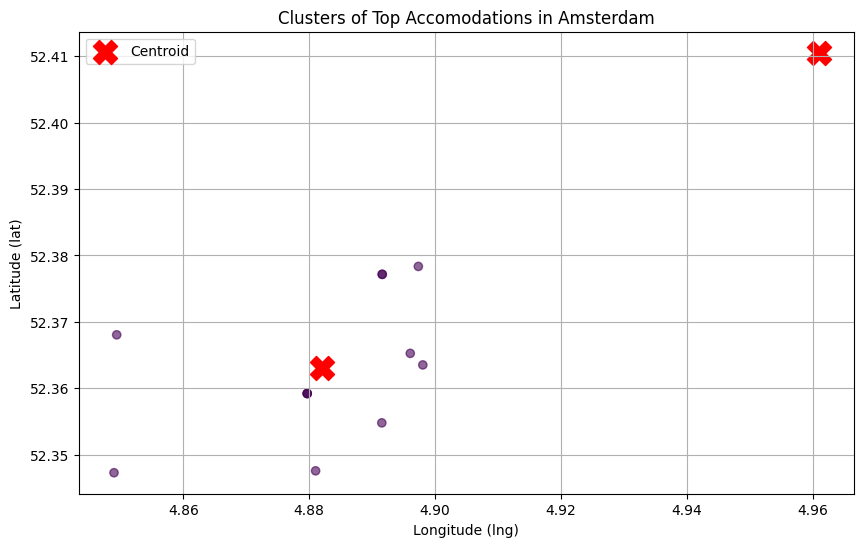

<ipython-input-40-daae1c1f0930>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


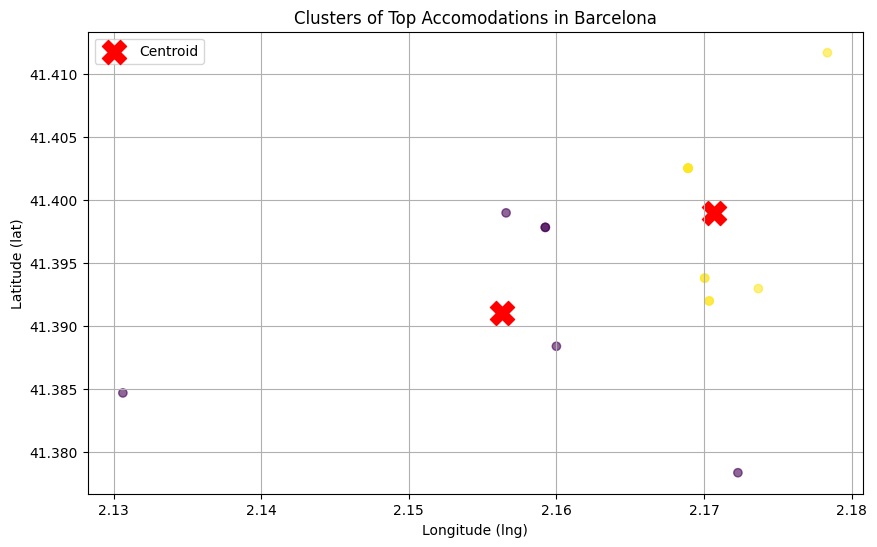

<ipython-input-40-daae1c1f0930>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


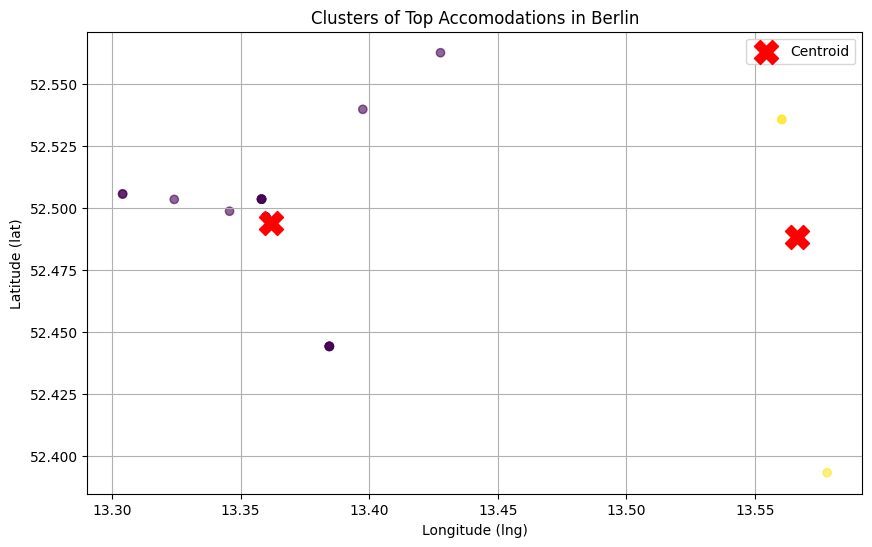

<ipython-input-40-daae1c1f0930>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


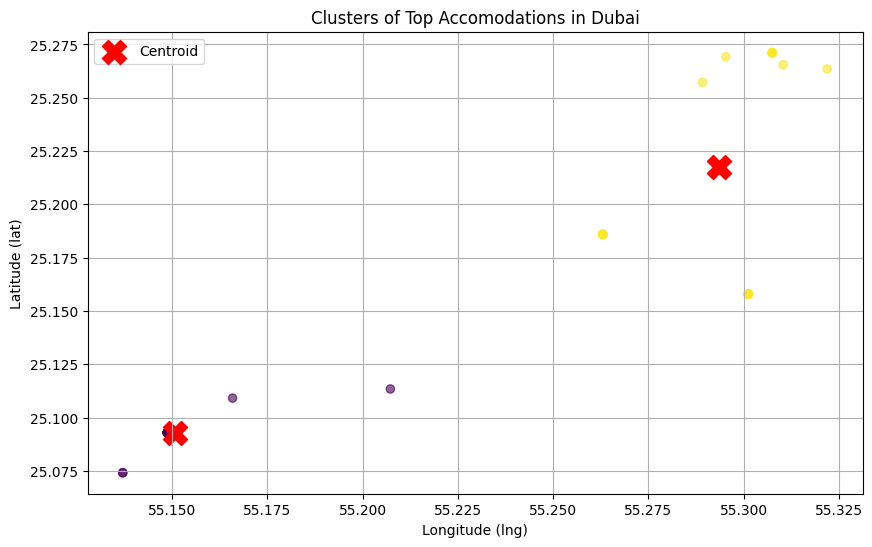

<ipython-input-40-daae1c1f0930>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


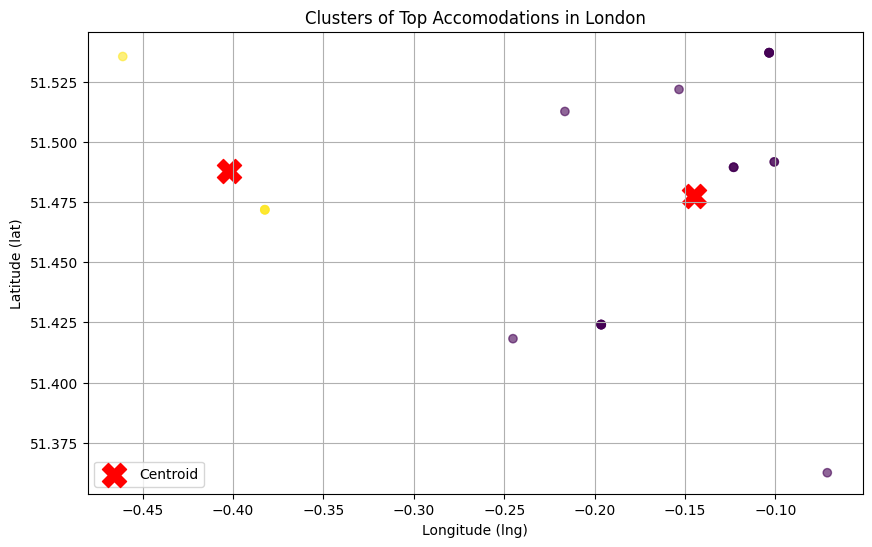

<ipython-input-40-daae1c1f0930>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


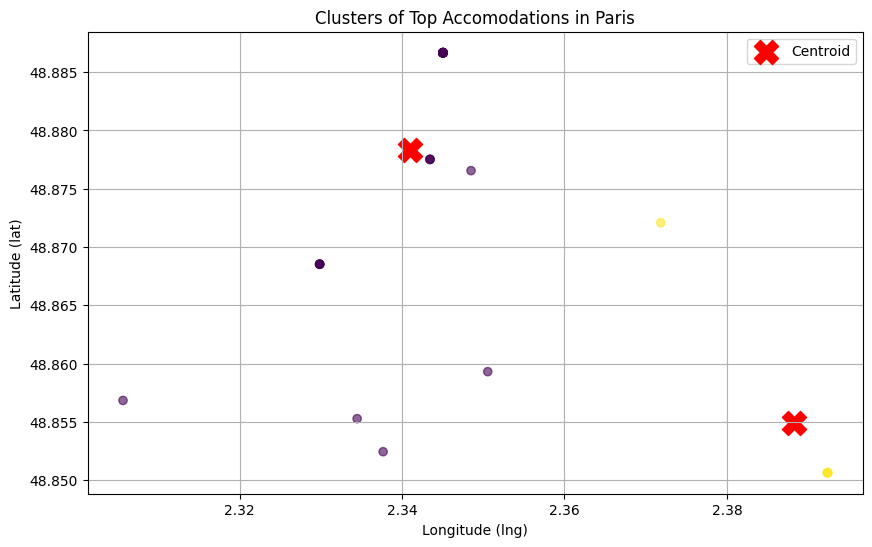

<ipython-input-40-daae1c1f0930>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


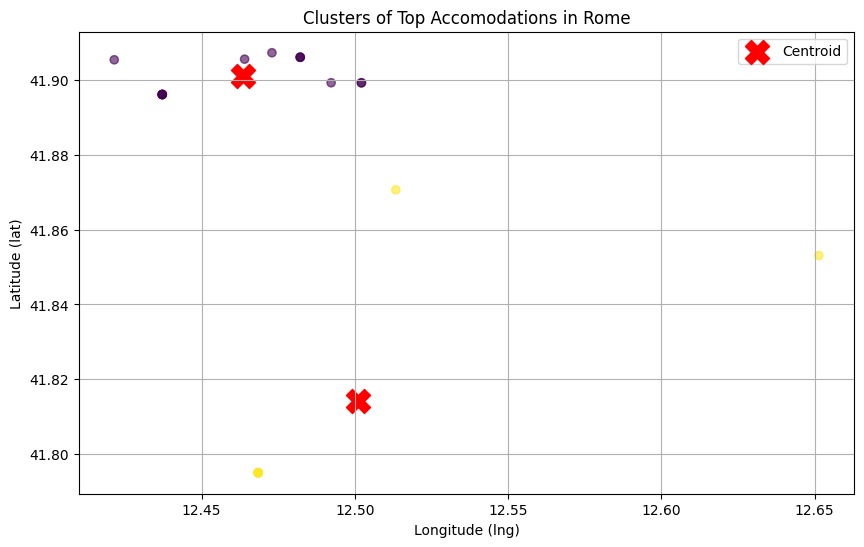

<ipython-input-40-daae1c1f0930>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = labels


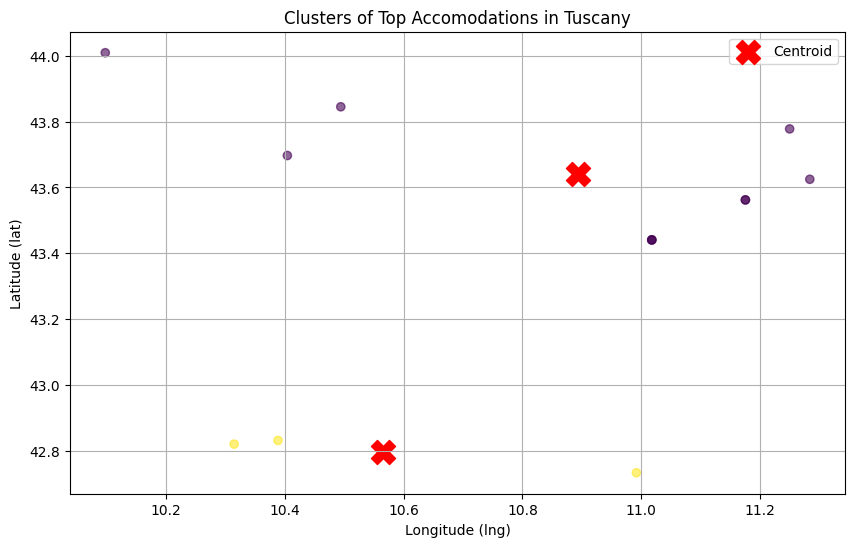

    location  avg_score  silhouette_score  \
0  Amsterdam   5.000000          0.680634   
1  Barcelona   5.000000          0.395291   
2     Berlin   5.000000          0.728161   
3      Dubai   4.943333          0.820027   
4     London   5.000000          0.673224   
5      Paris   4.950000          0.726352   
6       Rome   5.000000          0.595825   
7    Tuscany   5.000000          0.508802   

                                 avg_coords  
0   (52.366715653076916, 4.888119796076923)  
1   (41.39619630235295, 2.1656066005882355)  
2   (52.49321525047619, 13.391060808571426)  
3   (25.146593387727265, 55.21242469795454)  
4  (51.47924136695653, -0.1897332618417391)  
5           (48.8747965, 2.348136144848485)  
6   (41.87210196952381, 12.475925553333333)  
7  (43.444848476923084, 10.817543686923075)  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

d_avg = d.groupby(['location', 'name'], as_index=False)['rating'].mean()

d_avg = d_avg[d_avg['rating'] > 0]

locations = d_avg['location'].unique()

results = []

for location in locations:
    top_10_df = d_avg[d_avg['location'] == location].sort_values(by='rating', ascending=False).head(10)

    top_10_coords = top_10_df.merge(d[['name', 'location', 'lat', 'lng']], on=['name', 'location'], how='left')

    coords = top_10_coords[['lat', 'lng']]

    if len(coords) < 2:
        print(f"Not enough data points for clustering in {location}.")
        continue

    n_clusters = min(2, len(coords))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(coords)

    coords['cluster'] = labels

    silhouette_avg = silhouette_score(coords[['lat', 'lng']], labels) if n_clusters > 1 else None

    avg_score = top_10_df['rating'].mean()

    avg_lat = coords['lat'].mean()
    avg_lng = coords['lng'].mean()
    avg_coords = (avg_lat, avg_lng)
    results.append({
        'location': location,
        'avg_score': avg_score,
        'silhouette_score': silhouette_avg,
        'avg_coords': avg_coords
    })

    plt.figure(figsize=(10, 6))
    plt.scatter(coords['lng'], coords['lat'], c=labels, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', marker='X', label='Centroid')
    plt.title(f'Clusters of Top Accomodations in {location}')
    plt.xlabel('Longitude (lng)')
    plt.ylabel('Latitude (lat)')
    plt.grid(True)
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results)

print(results_df)
